# Q.No 1:PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS





In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from numpy import set_printoptions

from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from keras.models import Sequential
!pip install keras_tuner
from keras_tuner.tuners import RandomSearch
from keras.wrappers.scikit_learn import KerasClassifier

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.5 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires.csv


In [3]:
forest_fire=pd.read_csv('forestfires.csv')

In [4]:
forest_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
forest_fire.shape

(517, 31)

In [6]:
#Dropping unwanted Columns from the data
fire_data = forest_fire.drop(forest_fire.columns[[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]], axis=1)


In [7]:
fire_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [8]:
fire_data.shape

(517, 12)

**Contents in the Data**:

month : Month of the year: 'jan' to 'dec'

day : Day of the week: 'mon' to 'sun'

FFMC : Fine Fuel Moisture Code index from the
FWI system: 18.7 to 96.20

DMC : Duff Moisture Code index from the FWI system: 1.1 to 291.3

DC : Drought Code index from the FWI system: 7.9 to 860.6

ISI : Initial Spread Index from the FWI system: 0.0 to 56.10

temp : Temperature in Celsius degrees: 2.2 to 33.30

RH : Relative humidity in percentage: 15.0 to 100

wind : Wind speed in km/h: 0.40 to 9.40

rain : Outside rain in mm/m2 : 0.0 to 6.4

area : The burned area of the forest (in ha): 0.00 to 1090.84

In [9]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [10]:
fire_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [11]:
fire_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [12]:
fire_data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [13]:
#Duplicates Values Checking
fire_data[fire_data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [14]:
fire_data[fire_data.duplicated()].sum()

month                            augaugmarjunaugaugaugaug
day                              wedsunsatfrithusattuefri
FFMC                                                738.7
DMC                                                1211.0
DC                                                 4461.1
ISI                                                  71.2
temp                                                163.2
RH                                                    372
wind                                                 35.3
rain                                                  0.8
area                                                28.66
size_category    smallsmalllargesmallsmallsmallsmallsmall
dtype: object

In [15]:
#Types of Variables
# List of Numerical Variables
numerical_features = [feature for feature in fire_data.columns if fire_data[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
fire_data[numerical_features].head()

Number of numerical variables: 9


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [16]:
#Discrete VAlues
discrete_feature = [feature for feature in numerical_features if len(fire_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 2


In [17]:
#Continous Variables
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [18]:
#Categorical Variables
categorical = [var for var in fire_data.columns if fire_data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


In [19]:
#Frequency counts of Categorical variables
for var in categorical:
  print(fire_data[var].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
small    378
large    139
Name: size_category, dtype: int64


In [20]:
for var in categorical:
  print(fire_data[var].value_counts()/np.float(len(fire_data)))

aug    0.355899
sep    0.332689
mar    0.104449
jul    0.061896
feb    0.038685
jun    0.032882
oct    0.029014
apr    0.017408
dec    0.017408
jan    0.003868
may    0.003868
nov    0.001934
Name: month, dtype: float64
sun    0.183752
fri    0.164410
sat    0.162476
mon    0.143133
tue    0.123791
thu    0.117988
wed    0.104449
Name: day, dtype: float64
small    0.731141
large    0.268859
Name: size_category, dtype: float64


checking for cardinality

cardinality is the number of labels within a categorical variable

In [21]:
for var in categorical:
  print(var,'contains',len(fire_data[var].unique()),'labels')

month contains 12 labels
day contains 7 labels
size_category contains 2 labels


In [22]:
fire_data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


Data Visualisation

UNivaraite plots

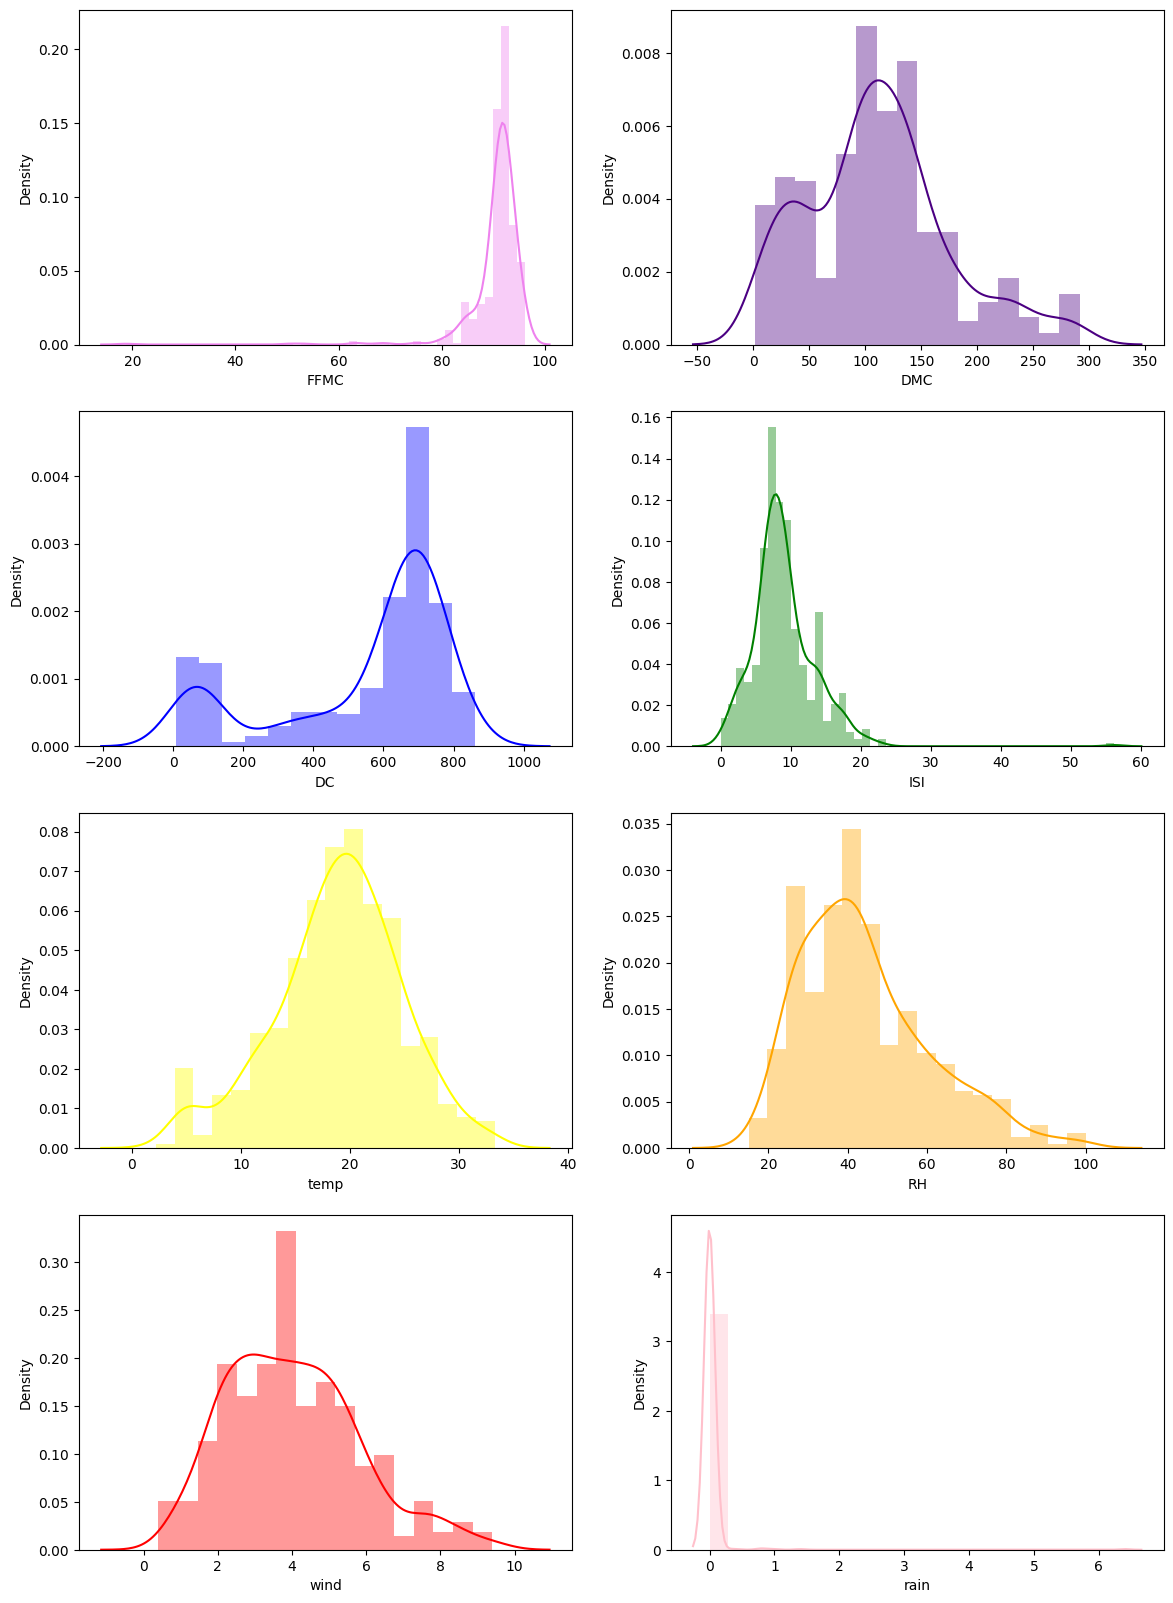

In [23]:
fig, ax = plt.subplots(4,2, figsize = (14,20))

sns.distplot(fire_data.FFMC, ax = ax[0,0],color='violet')
sns.distplot(fire_data.DMC, ax = ax[0,1],color='indigo')
sns.distplot(fire_data.DC, ax = ax[1,0],color='blue')
sns.distplot(fire_data.ISI, ax = ax[1,1],color='green')
sns.distplot(fire_data.temp, ax = ax[2,0],color='yellow')
sns.distplot(fire_data.RH, ax = ax[2,1],color='orange')
sns.distplot(fire_data.wind, ax = ax[3,0],color='red')
sns.distplot(fire_data.rain, ax = ax[3,1],color='pink')

plt.show()

**Outliers Detection**

In [24]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        Q1 = np.percentile(df[col],25)    # 1st quartile (25%)
        Q3 = np.percentile(df[col],75)    # 3rd quartile (75%)
        IQR = Q3 - Q1                     # Interquartile rrange (IQR)

        outlier_step = 1.5 * IQR          # outlier step

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(forest_fire[continuous_feature]))))


The dataset contains 3 observations with more than 2 outliers


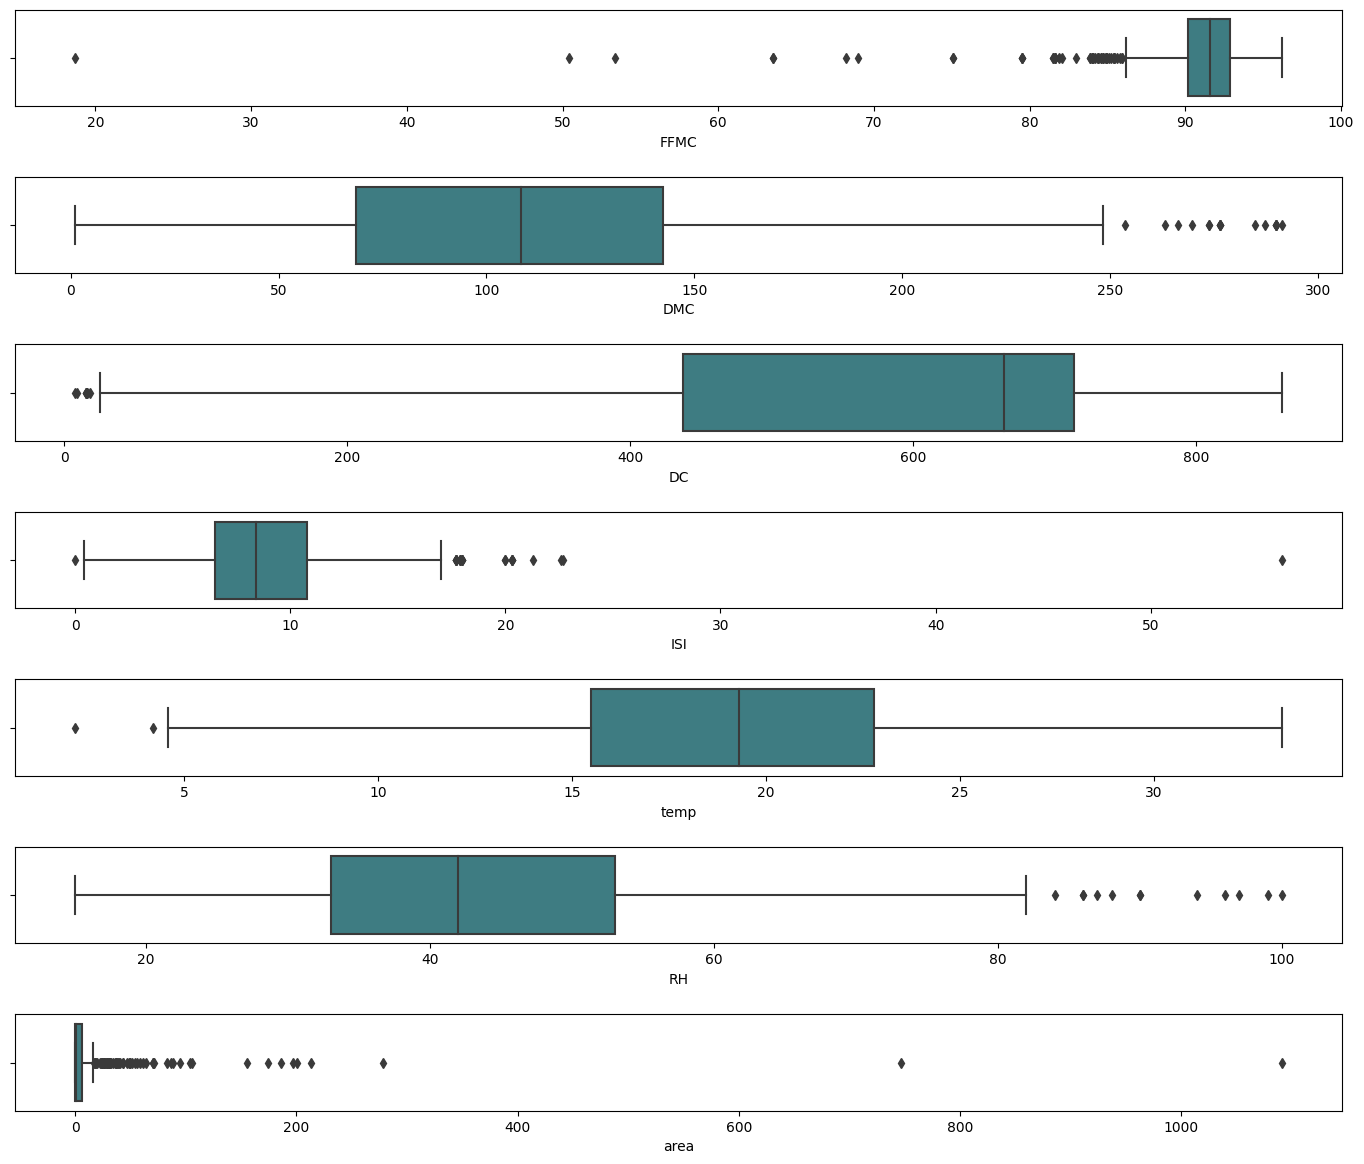

In [25]:
outlier = fire_data.copy()
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=outlier,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

Observation:

There are lot of outliers present in the dataframe


log transform

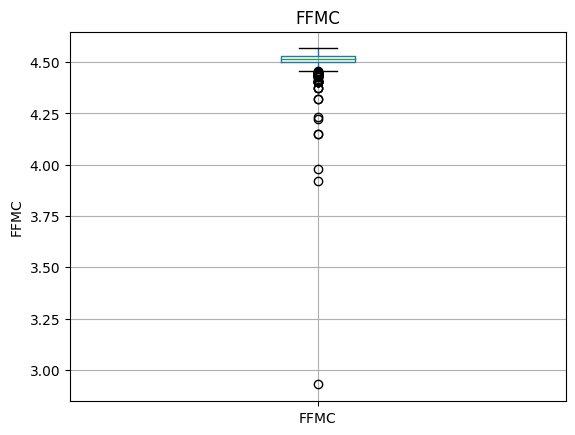

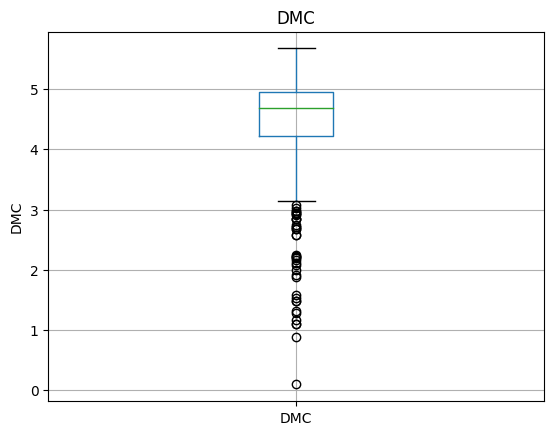

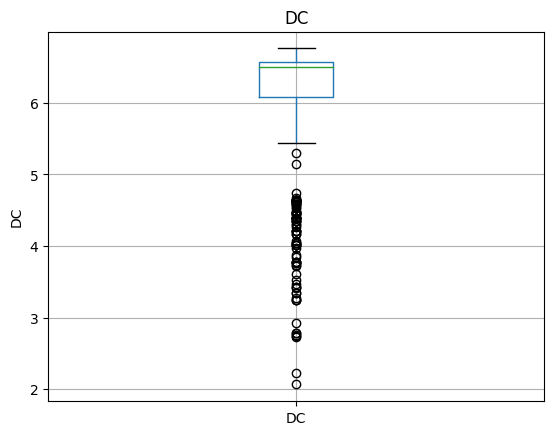

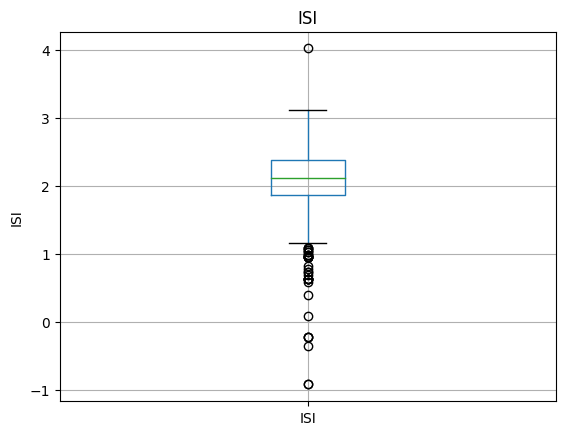

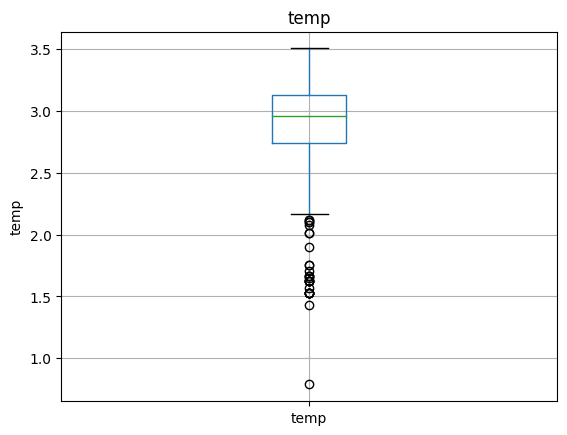

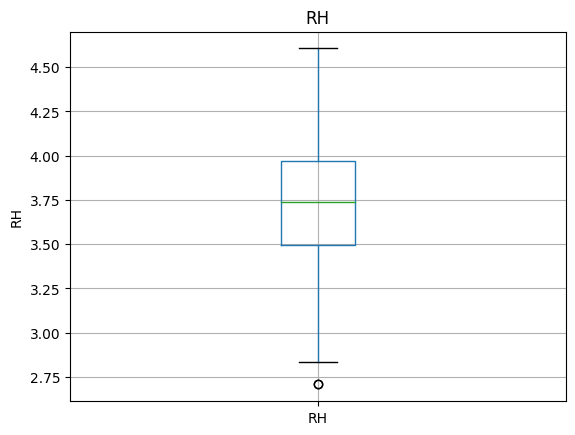

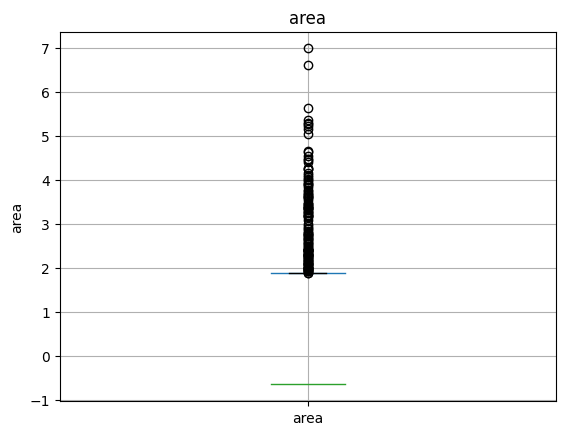

In [26]:
for feature in continuous_feature:
    data = fire_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Visualise the distribution of area and taking insights

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


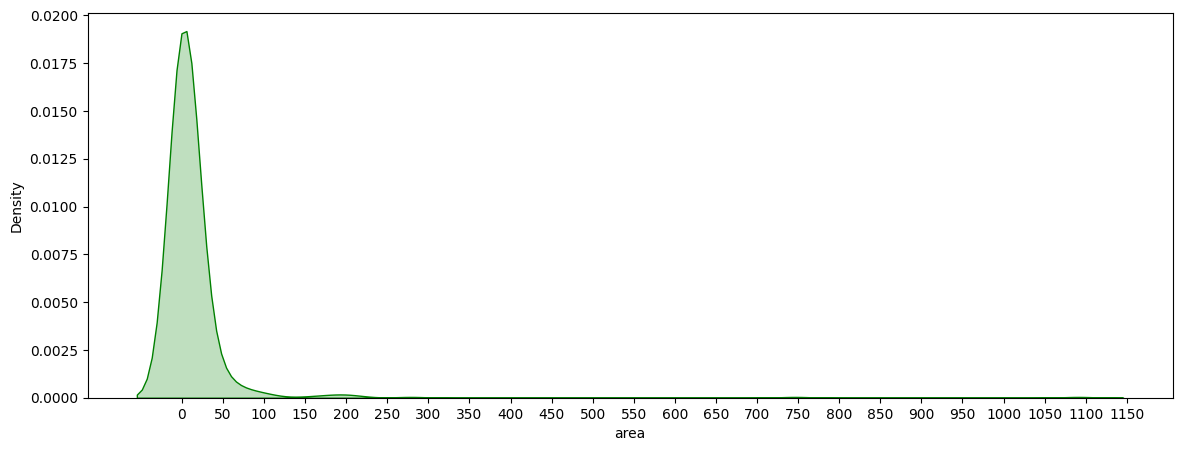

In [27]:
plt.figure(figsize=(14,5))
print("Skew: {}".format(fire_data['area'].skew()))
print("Kurtosis: {}".format(fire_data['area'].kurtosis()))
ax = sns.kdeplot(fire_data['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

In [28]:
#Categorical Variables
categorical_features=[feature for feature in fire_data.columns if fire_data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
forest_fire[categorical_features].head()

Number of Categorical Features: 3 
 ['month', 'day', 'size_category']


,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small


In [29]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(fire_data[feature].unique()),feature))


12 number of unique categories in feature named month
7 number of unique categories in feature named day
2 number of unique categories in feature named size_category


In [30]:
#Decide which categorical variables you want to use in model
for feature in fire_data.columns:
    if fire_data[feature].dtypes == 'object':      # in pandas it is object
        unique_cat = len(fire_data[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(fire_data[feature].value_counts())
        print()

Feature 'month' has 12 unique categories
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

Feature 'day' has 7 unique categories
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

Feature 'size_category' has 2 unique categories
small    378
large    139
Name: size_category, dtype: int64



Analyzing categorical columns

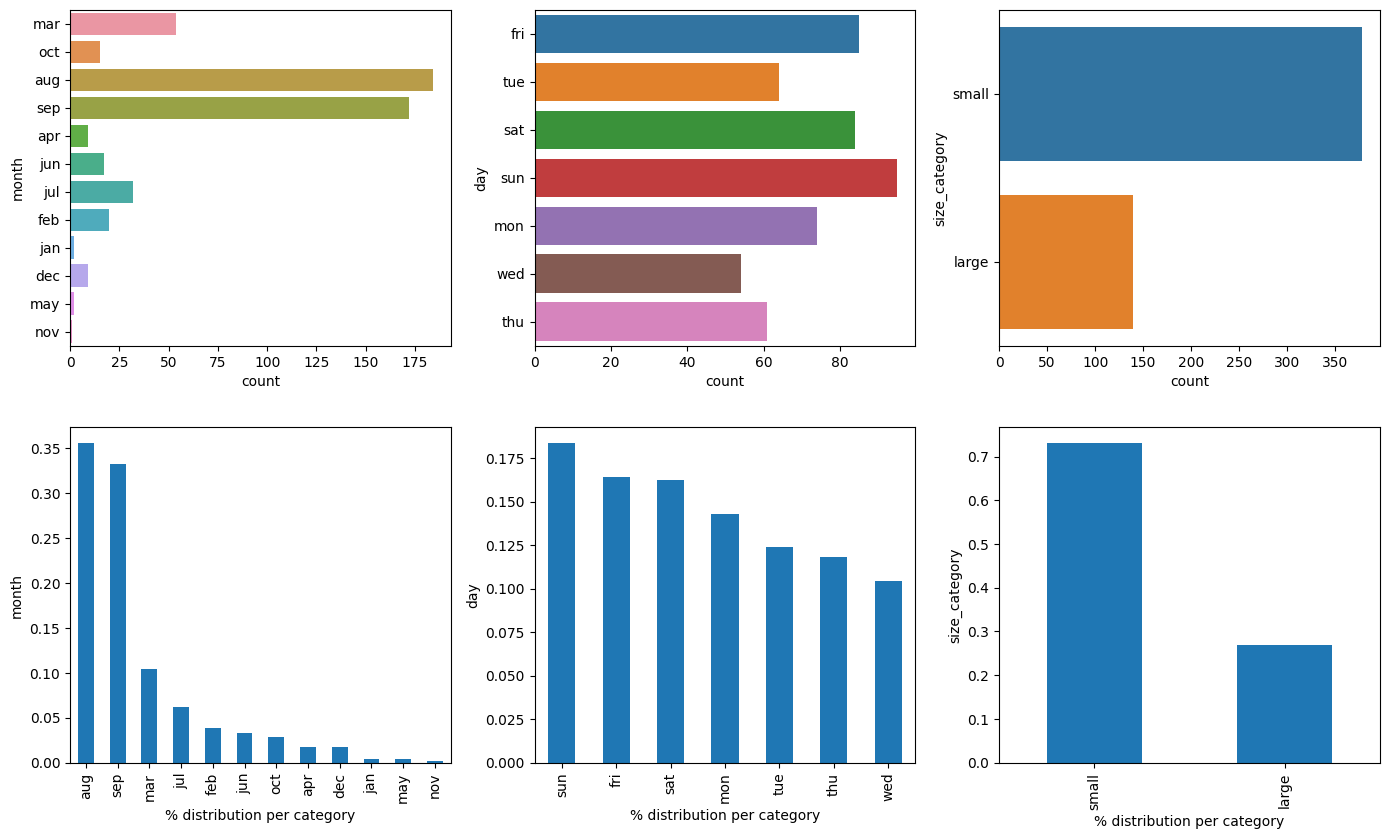

In [31]:
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data = fire_data,y=col)
    plt.subplot(3,3,i+3)
    fire_data[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

>It is interesting to see that abnormally high number of the forest fires occur in the month of August and September.

>In the case of day, the days from Friday to Monday have higher equal proportion of cases. (However, no strong indicators)May be because of the weekend animal throw some kind of cool party and

**BIvariate Analysis**

Analyzing the relationship of categorical features with respect to the Target feature

In [32]:
print(fire_data['area'].describe(),'\n')
# A categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high

df = fire_data.copy()
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 



,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,damage_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small,No damage
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small,No damage
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small,No damage
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small,No damage
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small,No damage


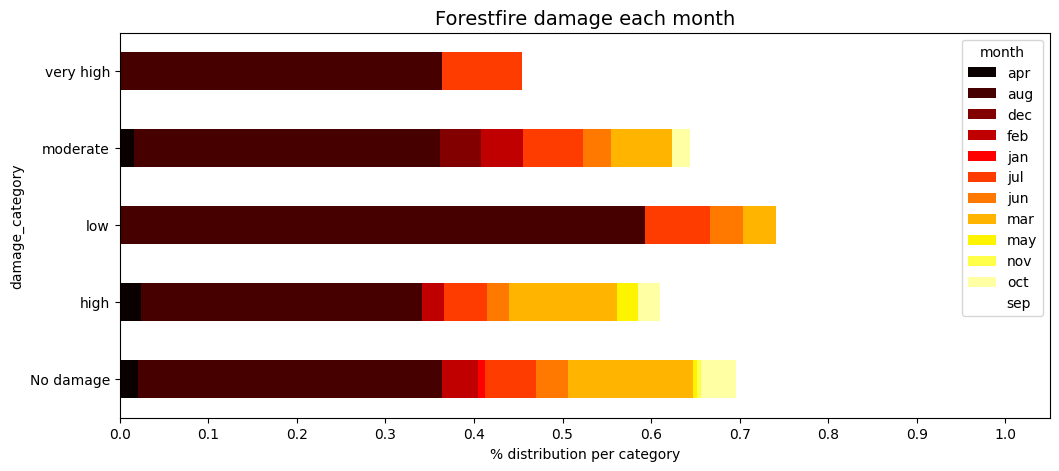

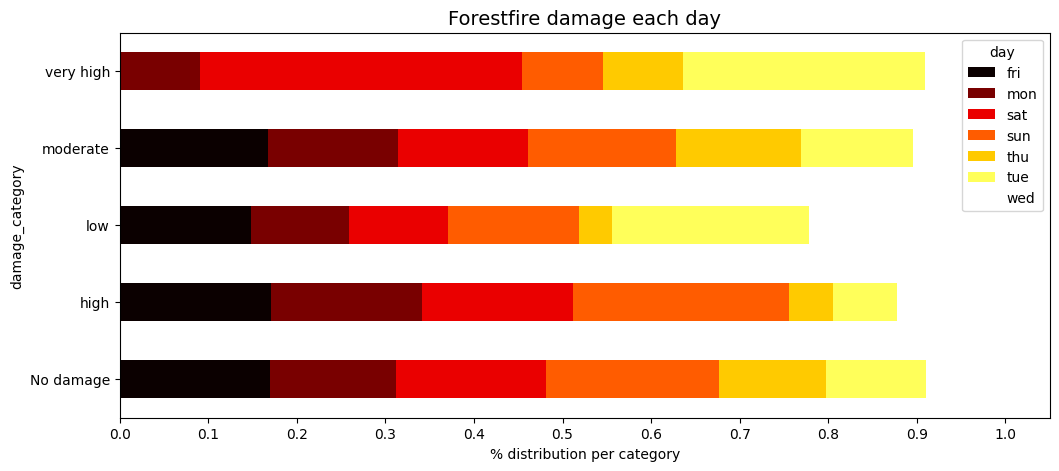

In [33]:
for col in categorical_features:
    if col!="size_category":
        cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
        cross.plot.barh(stacked=True,cmap='hot',figsize=(12,5))
        plt.xlabel('% distribution per category')
        plt.xticks(np.arange(0,1.1,0.1))
        plt.title("Forestfire damage each {}".format(col), fontsize=14)

plt.show()

>Previously we had observed that August and September had the most number of forest fires. And from the above plot of month, we can understand few things

>Most of the fires in August were low (< 1 hectare).

>The very high damages(>100 hectares) happened in only 3 months - august,jan and september.

>Regarding fire damage per day, nothing much can be observed. Except that, there were no very high damaging fires on Friday and on Saturdays it has been reported most.

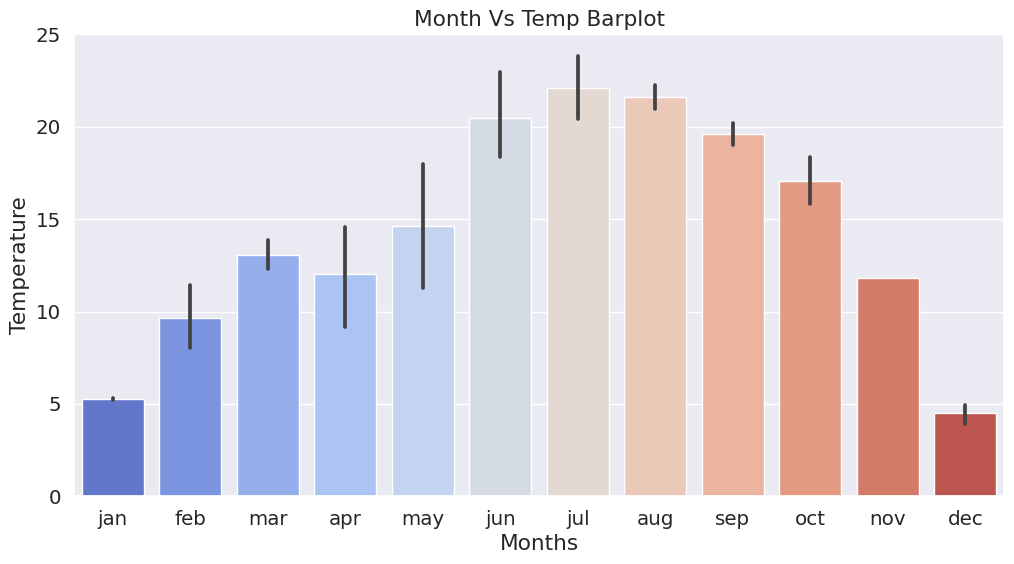

In [34]:
plt.rcParams['figure.figsize'] = [12,6]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = fire_data,
                           order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'coolwarm')
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");


Monthly analysis of burnt area, where the condition is: area>0

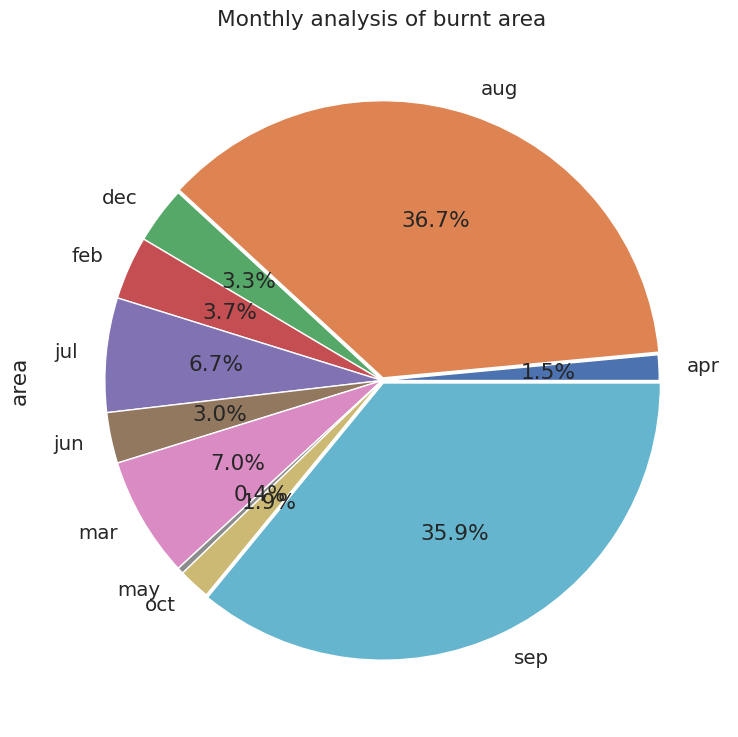

In [35]:
areaburnt = fire_data[fire_data['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.01,0,0,0,0,0,0,0,0.01],autopct='%0.1f%%')
plt.show()

Observations:
1. according to pie chart Sep and Aug is the month with highest ratio of forest fire 35.9% and 36.7% respectively.

2. may is recorded as th least forest fire accidents as 0.4%

3. other months are recorded as low forest fire accidents because low value in data.

**Visualize the Large Forest Fire Size rate by month**

In [36]:
df1 = fire_data.copy()
order = {'month':{'jan':'January','feb':'February','mar':'March','apr':'April','may':'May','jun':'June','jul':'July','aug':'August','sep':'September','oct':'October','nov':'November','dec':'December'}}
df1 = df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month.drop('month',axis = 1,inplace = True)
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
month

,% Small Forest Fire,% Large Forest Fire
January,100.000000,0.000000
February,70.000000,30.000000
March,77.777778,22.222222
April,77.777778,22.222222
May,50.000000,50.000000
June,82.352941,17.647059
July,71.875000,28.125000
August,76.630435,23.369565
September,70.348837,29.651163
October,73.333333,26.666667


Change 'month' from words to numbers for easier analysis

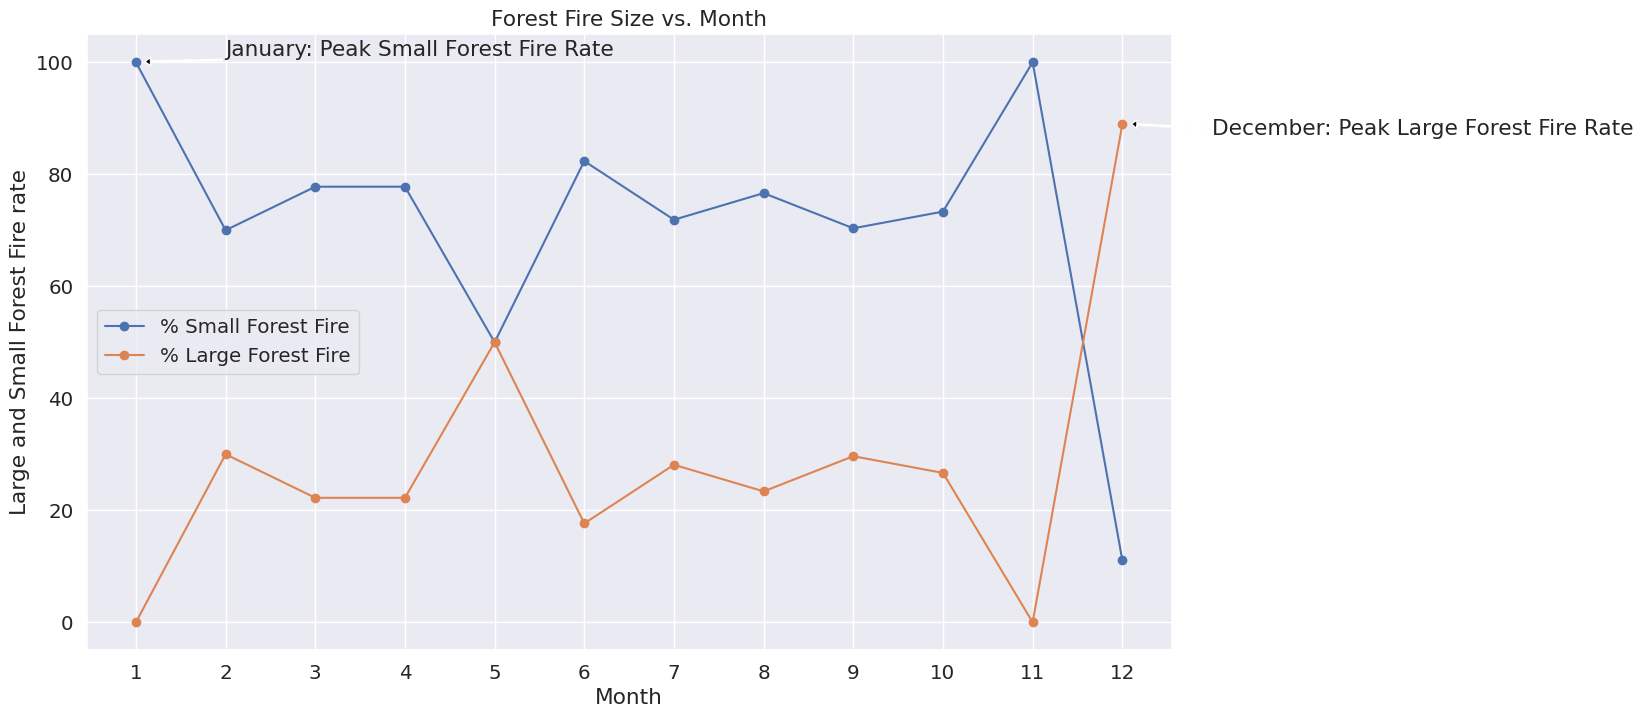

In [37]:
df1 = fire_data.copy()
order = {'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df1 = df1.replace(order)

count_month_response_pct = pd.crosstab(df1['size_category'],df1['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df1['month'].value_counts())
month['% Small Forest Fire'] = count_month_response_pct['small']
month['% Large Forest Fire'] = count_month_response_pct['large']
month.drop('month',axis = 1,inplace = True)
month['Month'] = ['August','September','March','July','February','June','October','April','December','January','May','November']
month['index'] = [8,9,3,7,2,6,10,4,12,1,5,11]
month = month.sort_values('index',ascending = True)
month.drop('index', axis=1,inplace=True)
plot_month = month[['% Small Forest Fire','% Large Forest Fire']].plot(kind ='line', figsize = (14,8), marker = 'o')

plt.title('Forest Fire Size vs. Month')
plt.ylabel('Large and Small Forest Fire rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of Small fire rate
y = month['% Small Forest Fire'].max()
x = month['% Small Forest Fire'].idxmax()
plt.annotate('January: Peak Small Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of large fire rate
y = month['% Large Forest Fire'].max()
x = month['% Large Forest Fire'].idxmax()
plt.annotate('December: Peak Large Forest Fire Rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

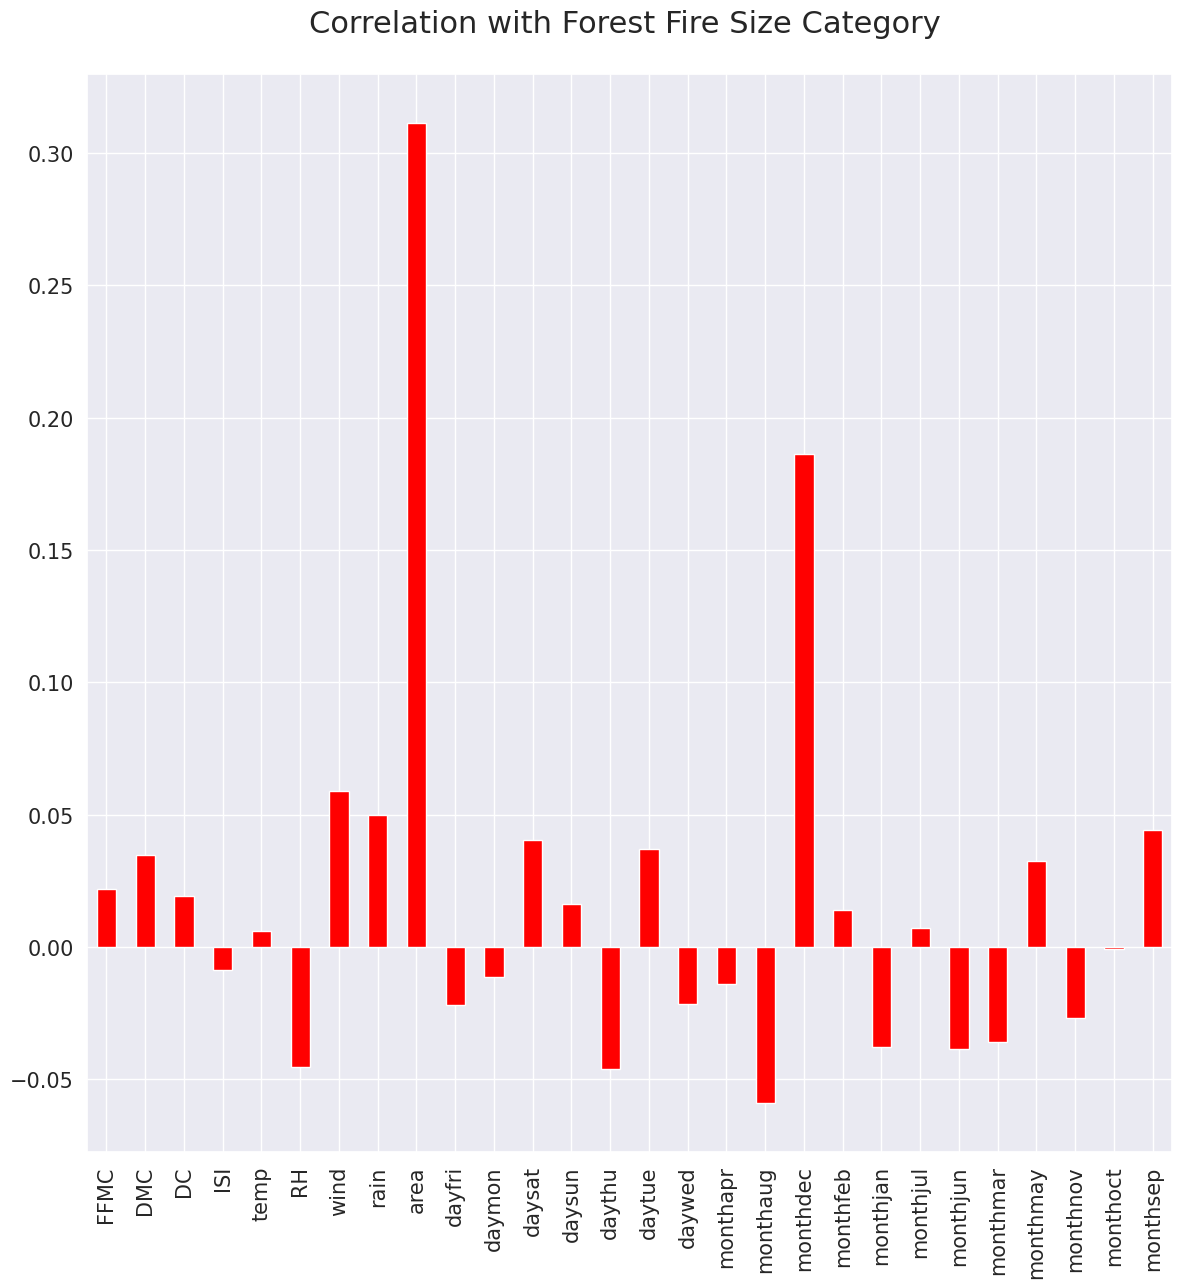

In [38]:
df = fire_data.copy()
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)

correlations = forest_fire.corrwith(df.size_category)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize= (14,14), fontsize = 15, color = 'red', rot = 90, grid = True)
plt.title('Correlation with Forest Fire Size Category \n', horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif");

In [39]:
#Analysis of response Column
fire_data.size_category.unique()

array(['small', 'large'], dtype=object)

In [40]:
#Checking for Imbalanced or balanced dataset with regards to the Target
countsizesmall = len(fire_data[fire_data.size_category == 'small'])
countsizelarge = len(fire_data[fire_data.size_category == 'large'])
print("Percentage of Small Forest Fire Size: {:.2f}%".format((countsizesmall / (len(fire_data.size_category))*100)))
print("Percentage of Large Foreset Fire Size: {:.2f}%".format((countsizelarge / (len(fire_data.size_category))*100)))

Percentage of Small Forest Fire Size: 73.11%
Percentage of Large Foreset Fire Size: 26.89%


In [41]:
fire_data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

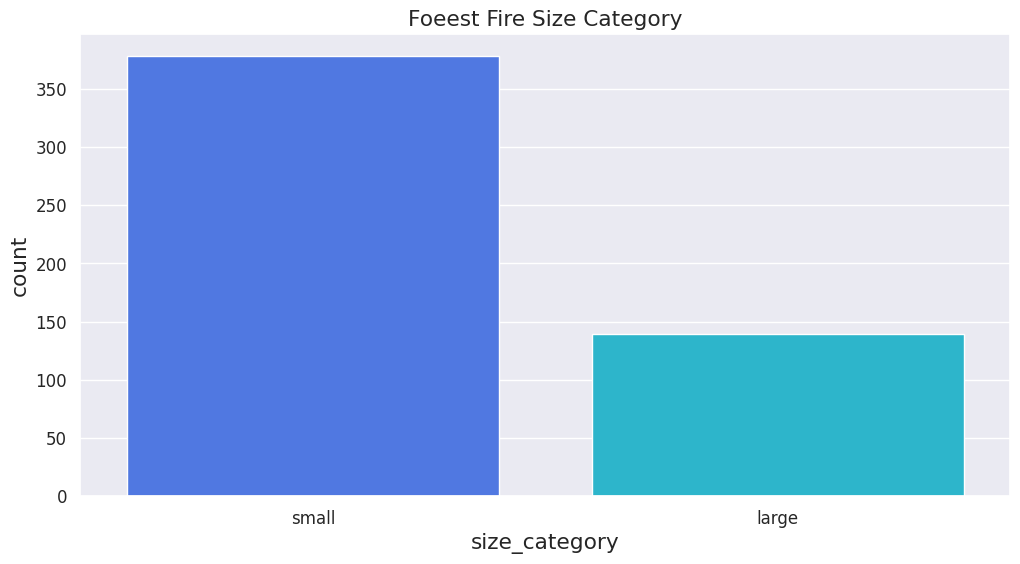

In [42]:
pal = sns.color_palette('rainbow')
sns.countplot(x='size_category', data= fire_data, palette = pal, order= fire_data['size_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Foeest Fire Size Category');


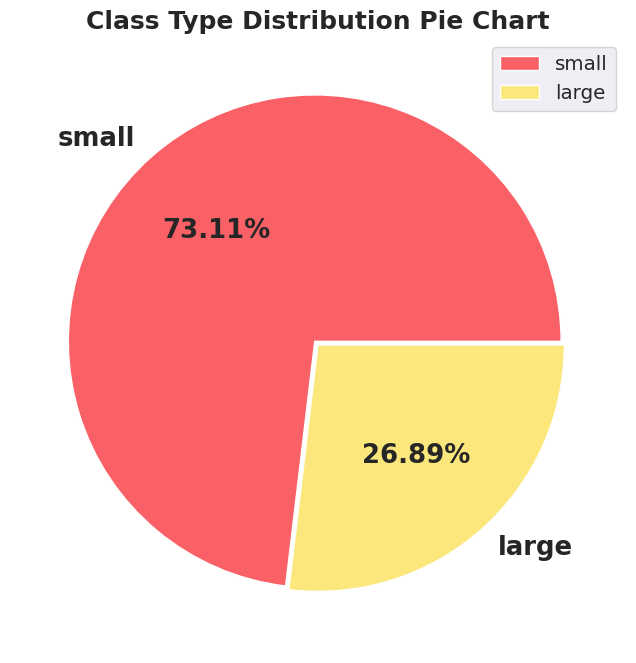

In [43]:
plt.figure(figsize = (8,8))
plt.pie(fire_data['size_category'].value_counts(), labels= fire_data.size_category.unique(),
        explode = [0.02,0.0], autopct= '%.2f%%', colors = ["#F96167", "#FCE77D"],
        textprops = {'size':'large', 'fontweight':'bold',})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

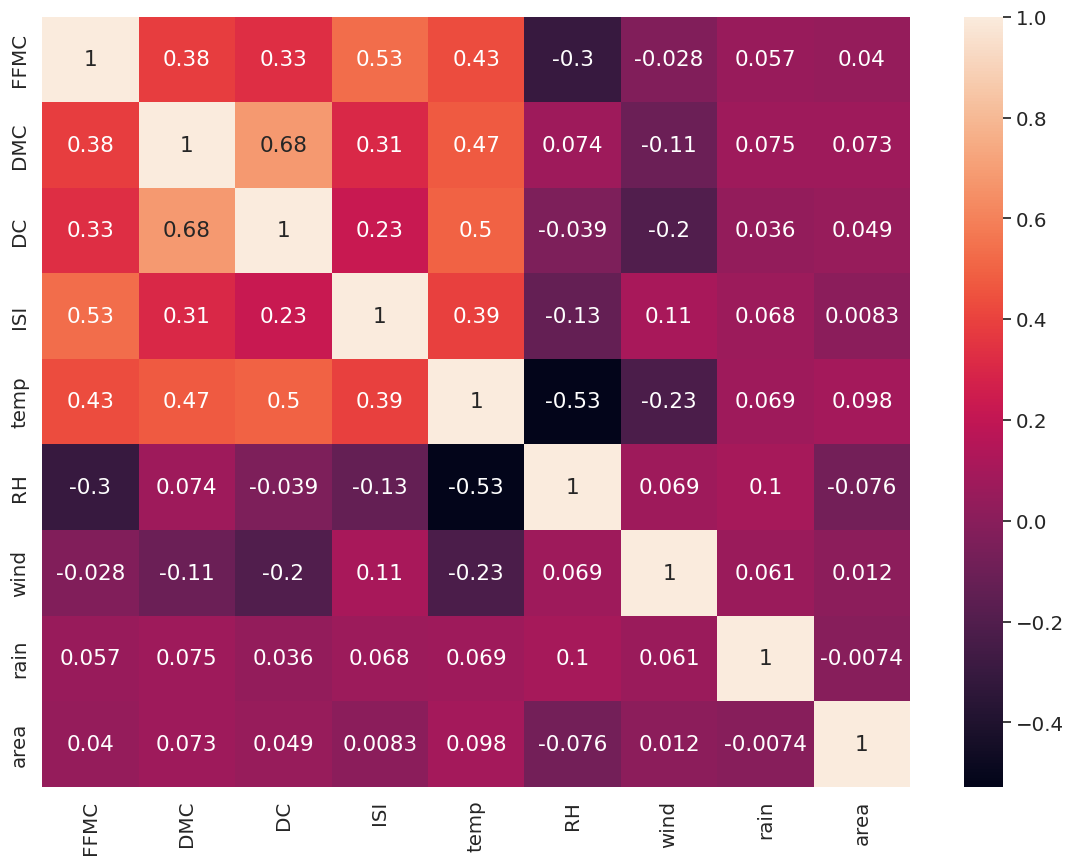

In [44]:
fig= plt.figure(figsize=(14,10))
sns.heatmap(fire_data.corr(), annot=True);
plt.xticks(rotation=90);

**DATA PREPROCESSING**

 Feature Engineering

In [45]:
#Applying Standard Scaler
continuous_feature=[feature for feature in fire_data.columns if fire_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 9


In [46]:
fire_data[continuous_feature]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [47]:
df_standard_scaled = fire_data.copy()
features = df_standard_scaled[continuous_feature]
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,small
1,oct,tue,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,small
2,oct,sat,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,small
3,mar,fri,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,small
4,mar,sun,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,small


In [48]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1))

Mean
 FFMC   -0.0
DMC    -0.0
DC      0.0
ISI     0.0
temp    0.0
RH      0.0
wind   -0.0
rain   -0.0
area    0.0
dtype: float64


In [49]:
print('Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Standard Devaition 
 FFMC    1.0
DMC     1.0
DC      1.0
ISI     1.0
temp    1.0
RH      1.0
wind    1.0
rain    1.0
area    1.0
dtype: float64 1


In [50]:
df = df_standard_scaled.copy()
df.drop('size_category',axis=1, inplace =True)
df = pd.get_dummies(df.iloc[:,:])
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,0,...,0,0,0,1,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,1,0,0,0,0,0,0,1,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,1,0,0,0,1,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,0,...,0,0,0,1,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,0,0,1,0,0,0


In [51]:
#Converting Categorical Variable into Label by using Get Dummies FeatureData Pre-Processing
# Converting string value into binary classes such as if "large" than classify it as '1' else 'O'
df['size_category'] = fire_data.size_category
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,1,0,0,0,0,0,0,1,0,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,1,0,0,0,1,0,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,0,1,0,0,0,0


In [52]:
df.size_category.unique()

array([0, 1])

Feature Selection Technique

In [53]:
forest_fire.drop(['month','day','area'] ,axis=1, inplace= True)
data1 = forest_fire.copy()
data1.drop('size_category',axis=1, inplace =True)
data1 = pd.get_dummies(data1.iloc[:,:-1])
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,...,0,0,0,0,0,0,1,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [54]:
data1['size_category'] = df1.size_category
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,0,0,0,0,1,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,0,0,1,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,0,0,0,0,0,1,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,...,0,0,0,0,0,1,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,1,0,0,0,small


In [55]:
le = LabelEncoder()
le.fit(data1["size_category"])
data1["size_category"]=le.transform(data1["size_category"])
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,...,0,0,0,0,0,1,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1


Split into input (X) and output (y) variables

In [56]:
X=data1.drop('size_category',axis=1)
y=data1.size_category

Feature Extraction

In [57]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

Summarize Scores

In [58]:
scores = fit.scores_
features = fit.transform(X)
score_df = pd.DataFrame(list(zip(scores, X.columns)), columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
1,23.006108,DMC
2,21.872657,DC
17,17.601210,monthdec
5,6.350054,RH
7,5.216072,rain
6,1.440661,wind
16,1.157358,monthaug
12,0.964276,daythu
21,0.738170,monthjun
19,0.735450,monthjan


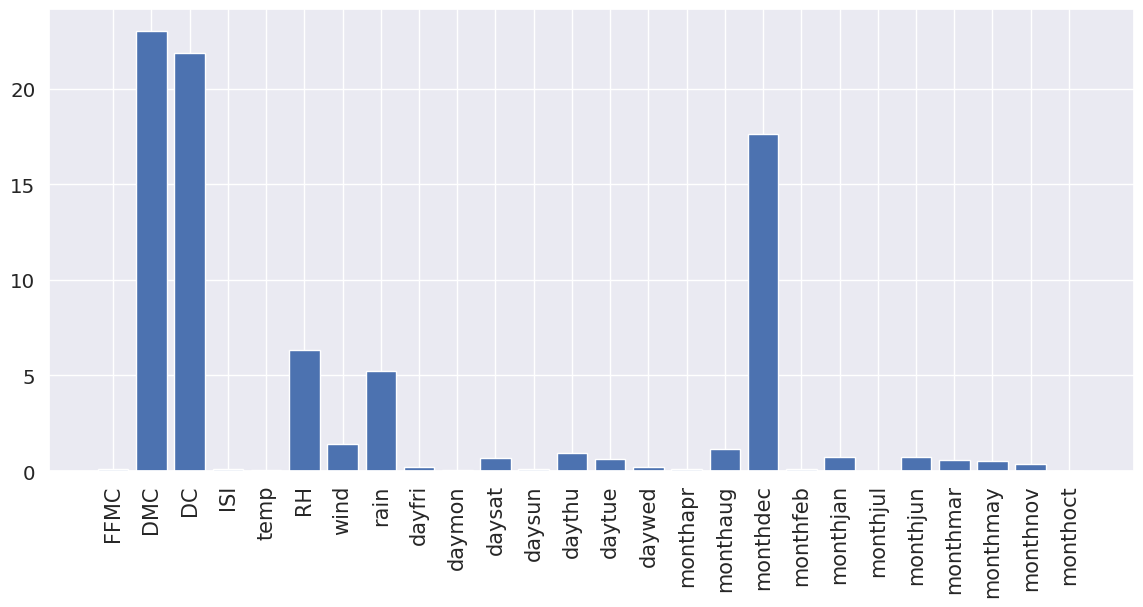

In [59]:
fig, axes = plt.subplots(figsize=(14,6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks(range(len(scores)))
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

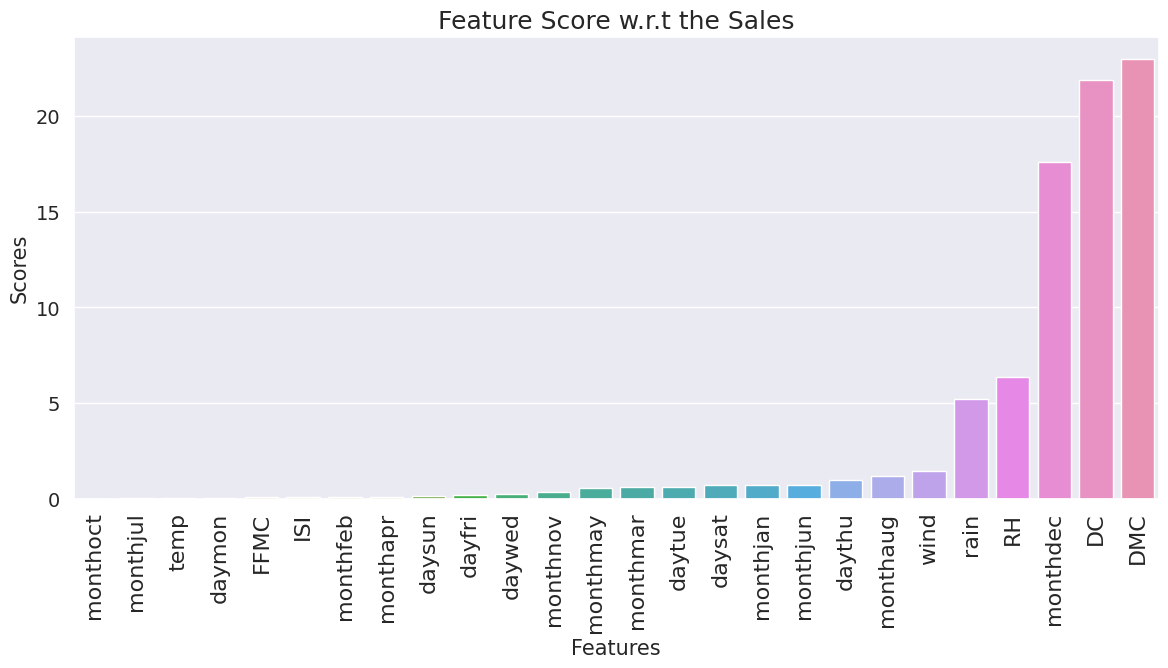

In [60]:
plt.figure(figsize=(14,6))
sns.barplot(x= 'Feature', y= "Score", data= score_df, order= score_df.sort_values('Score').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [61]:
model_data=df[['DMC','DC','RH','rain','wind','area','month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep','size_category']]


In [62]:
model_data

,DMC,DC,RH,rain,wind,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,size_category
0,-1.323326,-1.830477,0.411724,-0.073268,1.498614,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
1,-1.179541,0.488891,-0.692456,-0.073268,-1.741756,-0.202020,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-1.049822,0.560715,-0.692456,-0.073268,-1.518282,-0.202020,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-1.212361,-1.898266,3.233519,0.603155,-0.009834,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-0.931043,-1.798600,3.356206,-0.073268,-1.238940,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.846648,0.474768,-0.753800,-0.073268,-0.736124,-0.100753,0,1,0,0,0,0,0,0,0,0,0,0,1
513,-0.846648,0.474768,1.638592,-0.073268,0.995798,0.651674,0,1,0,0,0,0,0,0,0,0,0,0,1
514,-0.846648,0.474768,1.577248,-0.073268,1.498614,-0.026532,0,1,0,0,0,0,0,0,0,0,0,0,1
515,0.549003,0.269382,-0.140366,-0.073268,-0.009834,-0.202020,0,1,0,0,0,0,0,0,0,0,0,0,0


Test Train Split With Imbalanced Dataset

In [63]:
x = model_data.drop('size_category',axis=1)
y = model_data[['size_category']]

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3, stratify=y)
len(x_train.columns)

18

**Hyperparameter Tuning**

Hyperparameter Tuning: Optimal Learning rate ,Number of Layers and Neurons

In [65]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=100, step=32), activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [66]:
tuner = RandomSearch(build_model, objective= 'val_accuracy', max_trials= 5,
                     executions_per_trial=3, directory= 'project', project_name= 'Forest Fire')
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [67]:
tuner.search(x_train, y_train, epochs= 100, validation_data= (x_test, y_test))

Trial 5 Complete [00h 01m 07s]
val_accuracy: 0.9188034335772196

Best val_accuracy So Far: 0.9764957229296366
Total elapsed time: 00h 05m 06s


In [68]:
tuner.results_summary()

Results summary
Results in project/Forest Fire
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 2
units_0: 32
units_1: 32
learning_rate: 0.01
units_2: 32
units_3: 96
units_4: 32
units_5: 96
units_6: 32
units_7: 32
units_8: 32
units_9: 96
units_10: 64
units_11: 64
units_12: 96
units_13: 64
units_14: 64
units_15: 96
units_16: 32
units_17: 64
units_18: 64
units_19: 64
Score: 0.9764957229296366

Trial 0 summary
Hyperparameters:
num_layers: 20
units_0: 96
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
units_18: 32
units_19: 32
Score: 0.9508546988169352

Trial 4 summary
Hyperparameters:
num_layers: 15
units_0: 32
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 96
units_4: 32
units_5: 64
units_6: 96
units_7: 32
units_8: 96
units_9: 32
un

Hyperparameter Tuning: Optimal Batch_size, Number of Epochs

In [69]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(64,input_dim=18,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(units=1,activation="sigmoid"))

    adam = Adam(learning_rate=0.01)
    model1.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model1

In [70]:
model1 = KerasClassifier(build_fn= create_model, verbose=0)
batch_size = [10,20,40,50]
epochs = [10,50,100,200]
param_grid = dict(batch_size= batch_size, epochs=epochs)
grid = GridSearchCV(estimator= model1, param_grid= param_grid, cv= KFold(), verbose= 10)


In [71]:
grid_result=grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=0.875 total time=   1.2s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=1.000 total time=   1.2s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.968 total time=   1.2s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=0.903 total time=   1.3s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.968 total time=   1.3s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ....batch_size=10, epochs=50;

[CV 3/5; 5/16] END ....batch_size=20, epochs=10;, score=0.839 total time=   1.2s
[CV 4/5; 5/16] START batch_size=20, epochs=10...................................


[CV 4/5; 5/16] END ....batch_size=20, epochs=10;, score=0.903 total time=   1.3s
[CV 5/5; 5/16] START batch_size=20, epochs=10...................................
[CV 5/5; 5/16] END ....batch_size=20, epochs=10;, score=0.839 total time=   1.3s
[CV 1/5; 6/16] START batch_size=20, epochs=50...................................
[CV 1/5; 6/16] END ....batch_size=20, epochs=50;, score=0.875 total time=   2.2s
[CV 2/5; 6/16] START batch_size=20, epochs=50...................................
[CV 2/5; 6/16] END ....batch_size=20, epochs=50;, score=0.968 total time=   3.7s
[CV 3/5; 6/16] START batch_size=20, epochs=50...................................
[CV 3/5; 6/16] END ....batch_size=20, epochs=50;, score=0.968 total time=   1.8s
[CV 4/5; 6/16] START batch_size=20, epochs=50...................................
[CV 4/5; 6/16] END ....batch_size=20, epochs=50;, score=1.000 total time=   2.2s
[CV 5/5; 6/16] START batch_size=20, epochs=50...................................
[CV 5/5; 6/16] END ....batch

In [72]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{}, {} with {}".format(mean,stdev,param))

Best 0.9620967626571655, using {'batch_size': 20, 'epochs': 200}
0.9427419185638428, 0.046214671852652336 with {'batch_size': 10, 'epochs': 10}
0.94919353723526, 0.051233487175148834 with {'batch_size': 10, 'epochs': 50}
0.9493951439857483, 0.05427993920407009 with {'batch_size': 10, 'epochs': 100}
0.94919353723526, 0.04233678433220251 with {'batch_size': 10, 'epochs': 200}
0.8911290168762207, 0.05959017932125152 with {'batch_size': 20, 'epochs': 10}
0.9556451439857483, 0.04221371222927085 with {'batch_size': 20, 'epochs': 50}
0.9556451439857483, 0.04221371222927085 with {'batch_size': 20, 'epochs': 100}
0.9620967626571655, 0.04587568455888755 with {'batch_size': 20, 'epochs': 200}
0.8463709592819214, 0.05470216221956946 with {'batch_size': 40, 'epochs': 10}
0.9364919185638427, 0.04802450391166637 with {'batch_size': 40, 'epochs': 50}
0.9364919185638427, 0.05602517181139537 with {'batch_size': 40, 'epochs': 100}
0.94294353723526, 0.053629026870083876 with {'batch_size': 40, 'epochs': 2

 Hyperparameter Tuning: Optimal Droupout rate

In [73]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(64,input_dim=18,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(units=1,activation="sigmoid"))

    adam=Adam(lr=0.01)
    model2.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model2

In [74]:
model2=KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [75]:
grid_result2 = grid2.fit(x_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................
[CV 1/5; 1/6] END .............dropout_rate=0.0;, score=0.875 total time=   5.3s
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END .............dropout_rate=0.0;, score=1.000 total time=   6.2s
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END .............dropout_rate=0.0;, score=0.968 total time=   6.1s
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END .............dropout_rate=0.0;, score=1.000 total time=   6.2s
[CV 5/5; 1/6] START dropout_rate=0.0............................................
[CV 5/5; 1/6] END .............dropout_rate=0.0;, score=0.968 total time=   6.2s
[CV 1/5; 2/6] START dropout_rate=0.1............................................
[CV 1/5; 2/6] END .............dropout_rate=0.1;,

In [76]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best 0.9620967626571655, using {'dropout_rate': 0.0}
0.9620967626571655,0.04587568455888755 with {'dropout_rate': 0.0}
0.9491935253143311,0.03709676265716553 with {'dropout_rate': 0.1}
0.9556451439857483,0.04221371222927085 with {'dropout_rate': 0.2}
0.94919353723526,0.04233678433220251 with {'dropout_rate': 0.3}
0.9491935253143311,0.03709676265716553 with {'dropout_rate': 0.4}
0.9556451439857483,0.04221371222927085 with {'dropout_rate': 0.5}


Hyperparameter Tuning: Optimal Activation Function and Kernel Initializer

In [77]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(64,input_dim=18,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.0))
    model3.add(Dense(units=1,activation="sigmoid"))

    adam = Adam(lr=0.01)
    model3.compile(loss='binary_crossentropy', optimizer = adam, metrics=["accuracy"])
    return model3

In [78]:
model3 = KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
activation_function = ['softmax','tanh','relu']
init = ['normal','uniform','zero']
param_grid = dict(activation_function= activation_function, init= init)
grid3 = GridSearchCV(estimator= model3, param_grid= param_grid, cv= KFold(), verbose=10)

In [79]:
grid_result3 = grid3.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................
[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=0.875 total time=   4.5s
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................
[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=1.000 total time=   6.4s
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................
[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=0.903 total time=   6.2s
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................
[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=0.968 total time=   5.1s
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................
[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=0.968 total time=   6.1s
[CV 1/5; 2/9] START activation_function=softmax, init=uniform..............

In [80]:
print('Best {}, using {}'.format(grid_result3.best_score_, grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean, stdev, param))

Best 0.9683467626571656, using {'activation_function': 'relu', 'init': 'normal'}
0.9427419185638428,0.046214671852652336 with {'activation_function': 'softmax', 'init': 'normal'}
0.9620967626571655,0.04587568455888755 with {'activation_function': 'softmax', 'init': 'uniform'}
0.9618951439857483,0.03049890490417382 with {'activation_function': 'softmax', 'init': 'zero'}
0.94919353723526,0.04233678433220251 with {'activation_function': 'tanh', 'init': 'normal'}
0.9427419185638428,0.03610164807752721 with {'activation_function': 'tanh', 'init': 'uniform'}
0.9620967626571655,0.04587568455888755 with {'activation_function': 'tanh', 'init': 'zero'}
0.9683467626571656,0.03423622205401736 with {'activation_function': 'relu', 'init': 'normal'}
0.94919353723526,0.04233678433220251 with {'activation_function': 'relu', 'init': 'uniform'}
0.9556451439857483,0.04221371222927085 with {'activation_function': 'relu', 'init': 'zero'}


Building Neural Networks Model using Optimal Values

Initialising the ANN

In [81]:
def toFindBestParams(x_train, y_train, x_test, y_test):

    # Defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20 ]
    epoch_list      = [5 , 10 , 50 , 100]

    # Initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:

            # Create ANN model
            model = Sequential()

            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))

            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])

            # Fitting the ANN to the Training set
            model_trained = model.fit(x_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)

            # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]

            # Printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
toFindBestParams(x_train, y_train, x_test, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.8476454019546509
batch_size: 5 - epochs: 10 Accuracy: 0.9556786417961121
batch_size: 5 - epochs: 50 Accuracy: 0.9916897416114807
batch_size: 5 - epochs: 100 Accuracy: 0.9916897416114807
batch_size: 10 - epochs: 5 Accuracy: 0.7756232619285583
batch_size: 10 - epochs: 10 Accuracy: 0.8642659187316895
batch_size: 10 - epochs: 50 Accuracy: 0.9889196753501892
batch_size: 10 - epochs: 100 Accuracy: 0.9944598078727722
batch_size: 15 - epochs: 5 Accuracy: 0.7590027451515198
batch_size: 15 - epochs: 10 Accuracy: 0.81717449426651
batch_size: 15 - epochs: 50 Accuracy: 0.9944598078727722
batch_size: 15 - epochs: 100 Accuracy: 0.9944598078727722
batch_size: 20 - epochs: 5 Accuracy: 0.7590027451515198
batch_size: 20 - epochs: 10 Accuracy: 0.7867035865783691
batch_size: 20 - epochs: 50 Accuracy: 0.9833794832229614
batch_size: 20 - epochs: 100 Accuracy: 1.0


Training Model - using best params

In [82]:
# create ANN model
model = Sequential()

# Defining the first layer of the model
model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))

# Defining the Second layer of the model
model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)


Epoch 1/100
25/25 [==============================] - 1s 13ms/step - loss: 0.6885 - accuracy: 0.7220 - val_loss: 0.6843 - val_accuracy: 0.6917
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6726 - accuracy: 0.7635 - val_loss: 0.6677 - val_accuracy: 0.6917
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6338 - accuracy: 0.7635 - val_loss: 0.6295 - val_accuracy: 0.7083
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.5791 - accuracy: 0.7676 - val_loss: 0.5970 - val_accuracy: 0.7167
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5372 - accuracy: 0.7718 - val_loss: 0.5765 - val_accuracy: 0.7167
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.5128 - accuracy: 0.7759 - val_loss: 0.5651 - val_accuracy: 0.7250
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4941 - accuracy: 0.7842 - val_loss: 0.5529 - val_accuracy: 0.7417
Epoch 8/100


 Model Evaluation Train and Test Error

In [83]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.0988 - accuracy: 0.9787
accuracy: 97.87%


In [84]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Compare the train-set and test-set accuracy

Check for overfitting and underfitting

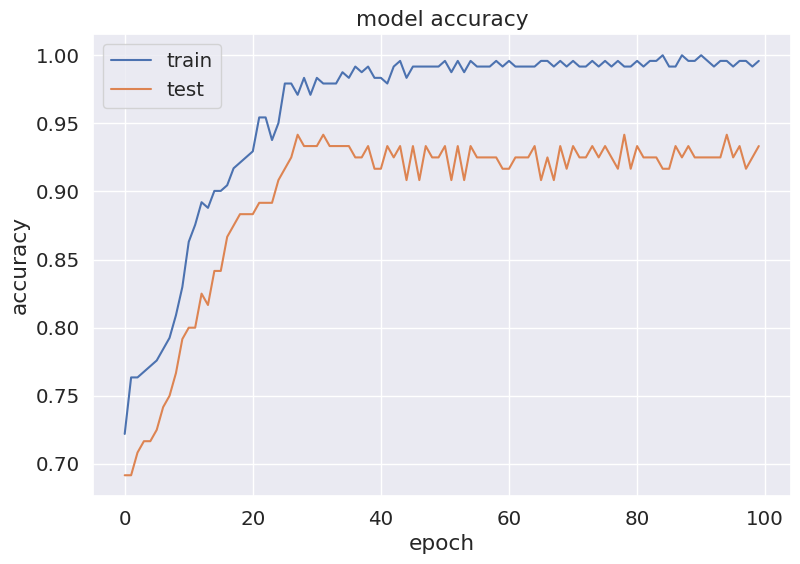

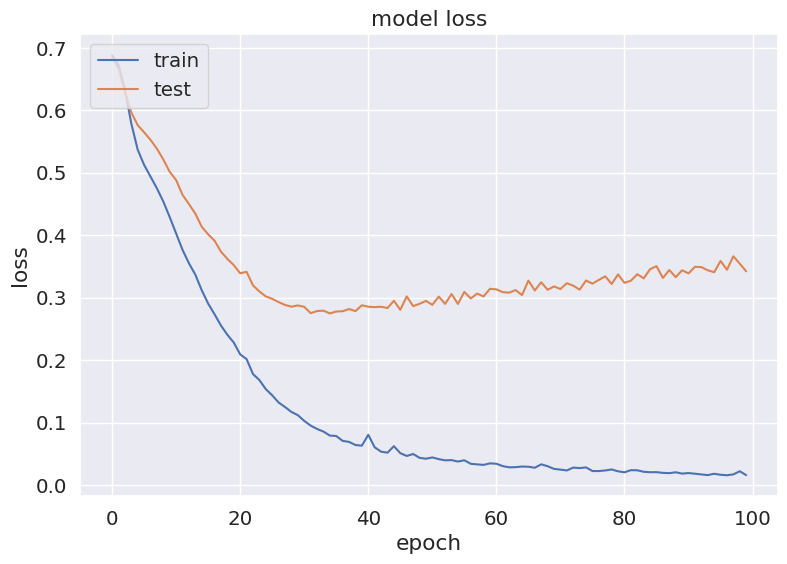

In [85]:
# summarize history for accuracy
plt.figure(figsize=(9,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(9,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Predicting values from Model using same dataset

In [86]:
# generating predictions for test data
y_predict_test = model.predict(x_test)

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test.size_category
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

5/5 [==============================] - 0s 3ms/step
(156, 3)


,Test_Actual,Test_Probability,Test_Predicted
493,1,0.997290,1
298,0,0.001696,0
93,0,0.001939,0
437,0,0.002249,0
340,0,0.016085,0
7,0,0.001980,0
172,0,0.004391,0
76,0,0.002175,0
148,0,0.002379,0
104,0,0.001712,0


In [87]:
# generating predictions for train data
y_predict_train = model.predict(x_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train.size_category
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

12/12 [==============================] - 0s 2ms/step
(361, 3)


,Train_Actual,Train_Probability,Train_Predicted
115,0,0.002714,0
130,0,0.002267,0
413,0,0.002092,0
350,0,0.012338,0
103,0,0.001887,0
511,0,0.001977,0
325,0,0.001944,0
473,1,0.997290,1
265,0,0.002080,0
226,1,0.997290,1


Classification Report

In [88]:
print("Accuracy score for Test Data    = ", np.round(accuracy_score(test_prediction['Test_Actual'],test_prediction['Test_Predicted']),2)*100,"%")
print("Confusion Matrix for Test Data  =\n", confusion_matrix(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))
print("Classification Report for Test Data  =\n", classification_report(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))


Accuracy score for Test Data    =  98.0 %
Confusion Matrix for Test Data  =
 [[112   2]
 [  1  41]]
Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       114
           1       0.95      0.98      0.96        42

    accuracy                           0.98       156
   macro avg       0.97      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



In [89]:
print("Accuracy score for Train Data    = ", np.round(accuracy_score(train_prediction['Train_Actual'],train_prediction['Train_Predicted']),2)*100,"%")
print("Confusion Matrix for Train Data  =\n", confusion_matrix(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))
print("Classification Report for Train Data  =\n", classification_report(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))


Accuracy score for Train Data    =  98.0 %
Confusion Matrix for Train Data  =
 [[261   3]
 [  5  92]]
Classification Report for Train Data  =
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       264
           1       0.97      0.95      0.96        97

    accuracy                           0.98       361
   macro avg       0.97      0.97      0.97       361
weighted avg       0.98      0.98      0.98       361



Neural Networks model using Linear Kernel has great predictive power to identify the fire size that would be either small or large int the Forest.

In [90]:
# print the scores on training and test set
y_predict_test = model.predict(x_test)
y_predict_train = model.predict(x_train)
print('Training set score : {:.2f}%'.format(accuracy_score(train_prediction['Train_Actual'], train_prediction['Train_Predicted'])*100))

print('Test set score     : {:.2f}%'.format(accuracy_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])*100))


12/12 [==============================] - 0s 2ms/step
Training set score : 97.78%
Test set score     : 98.08%


Confusion matrix

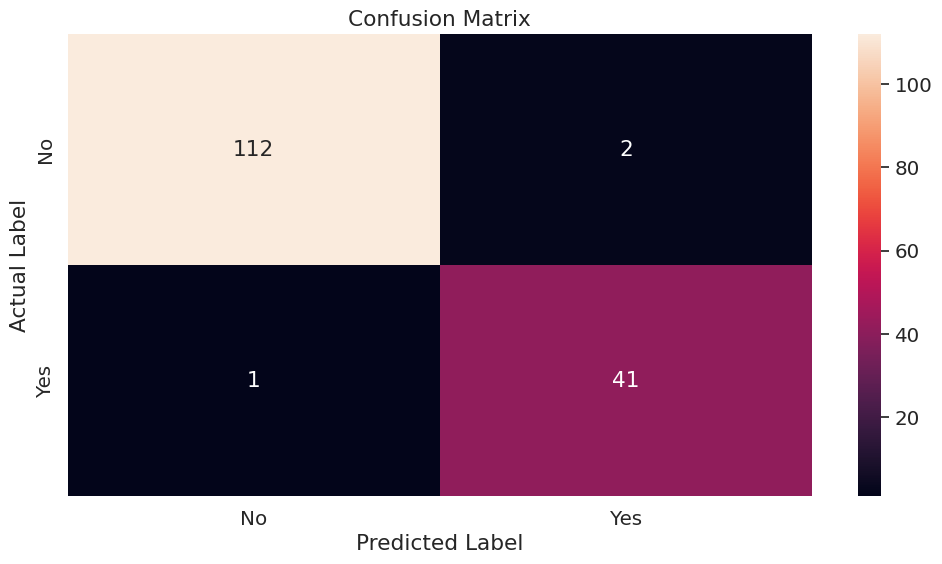

In [91]:
cm_df = confusion_matrix(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)

sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

ROC - AUC Curve

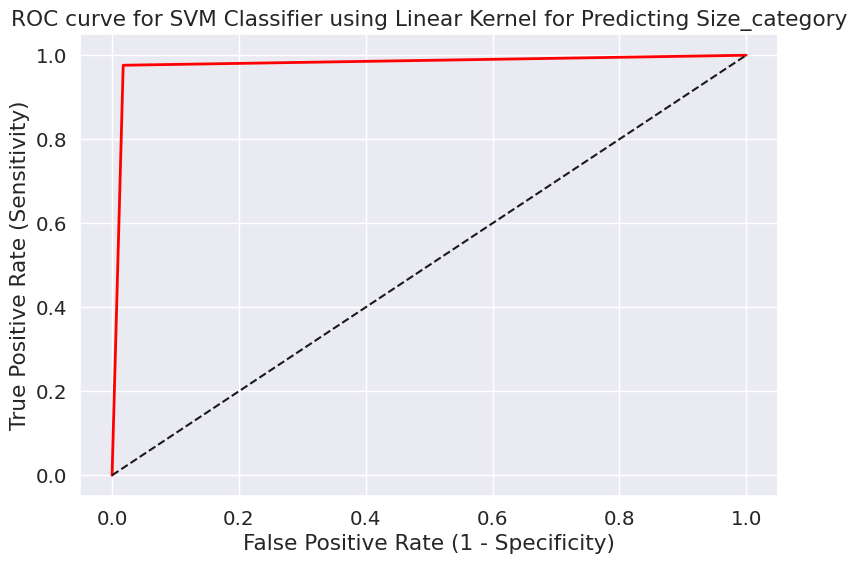

ROC AUC : 0.9793


In [92]:
plt.figure(figsize=(9,6))
fpr, tpr, thresholds = roc_curve(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC_AUC = roc_auc_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
print('ROC AUC : {:.4f}'.format(ROC_AUC))

Plot histogram of predicted probabilities

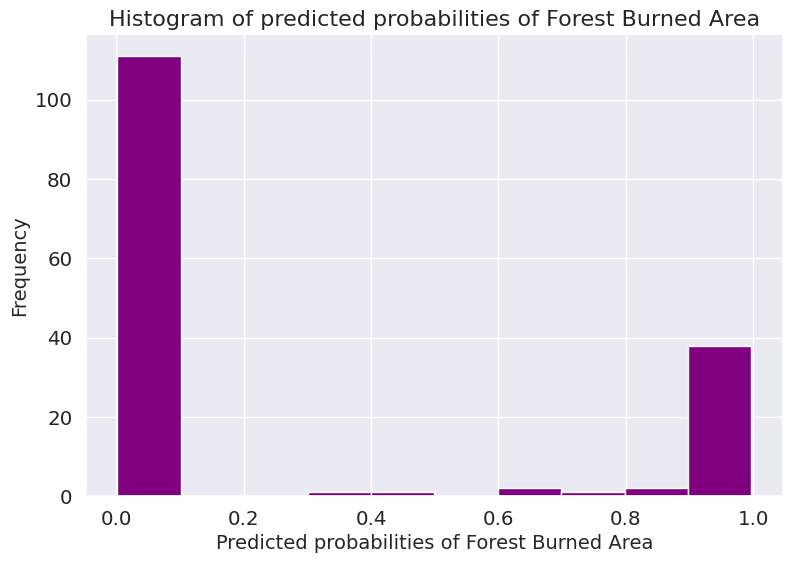

In [93]:
plt.figure(figsize=(9,6))
plt.hist(test_prediction['Test_Probability'], bins = 10,color='purple')
plt.title('Histogram of predicted probabilities of Forest Burned Area', fontsize=16)
plt.xlabel('Predicted probabilities of Forest Burned Area', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

#Q.NO 2 Predicting Turbine Energy Yield (TEY) using ambient variables as features.

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold

from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from keras.models import Sequential
from keras_tuner.tuners import RandomSearch
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

import warnings
warnings.filterwarnings('ignore')

In [95]:
from google.colab import files
uploaded=files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [96]:
df = pd.read_csv('gas_turbines.csv')



In [97]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [98]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

**Attribute Information:**


Variable (Abbr) Unit Min Max Mean

Ambient temperature (AT) C â€“6.23 37.10 17.71

Ambient pressure (AP) mbar 985.85 1036.56 1013.07

Ambient humidity (AH) (%) 24.08 100.20 77.87

Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93

Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56

Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43

Turbine after temperature (TAT) C 511.04 550.61 546.16

Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06

Turbine energy yield (TEY) MWH 100.02 179.50 133.51

Carbon monoxide (CO) mg/m3 0.00 44.10 2.37


Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

Data Exploration

In [99]:
df.shape

(15039, 11)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [101]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


df.dtypes

In [102]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [103]:
df.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [104]:
df.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [105]:
df.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [106]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

Data Visualization

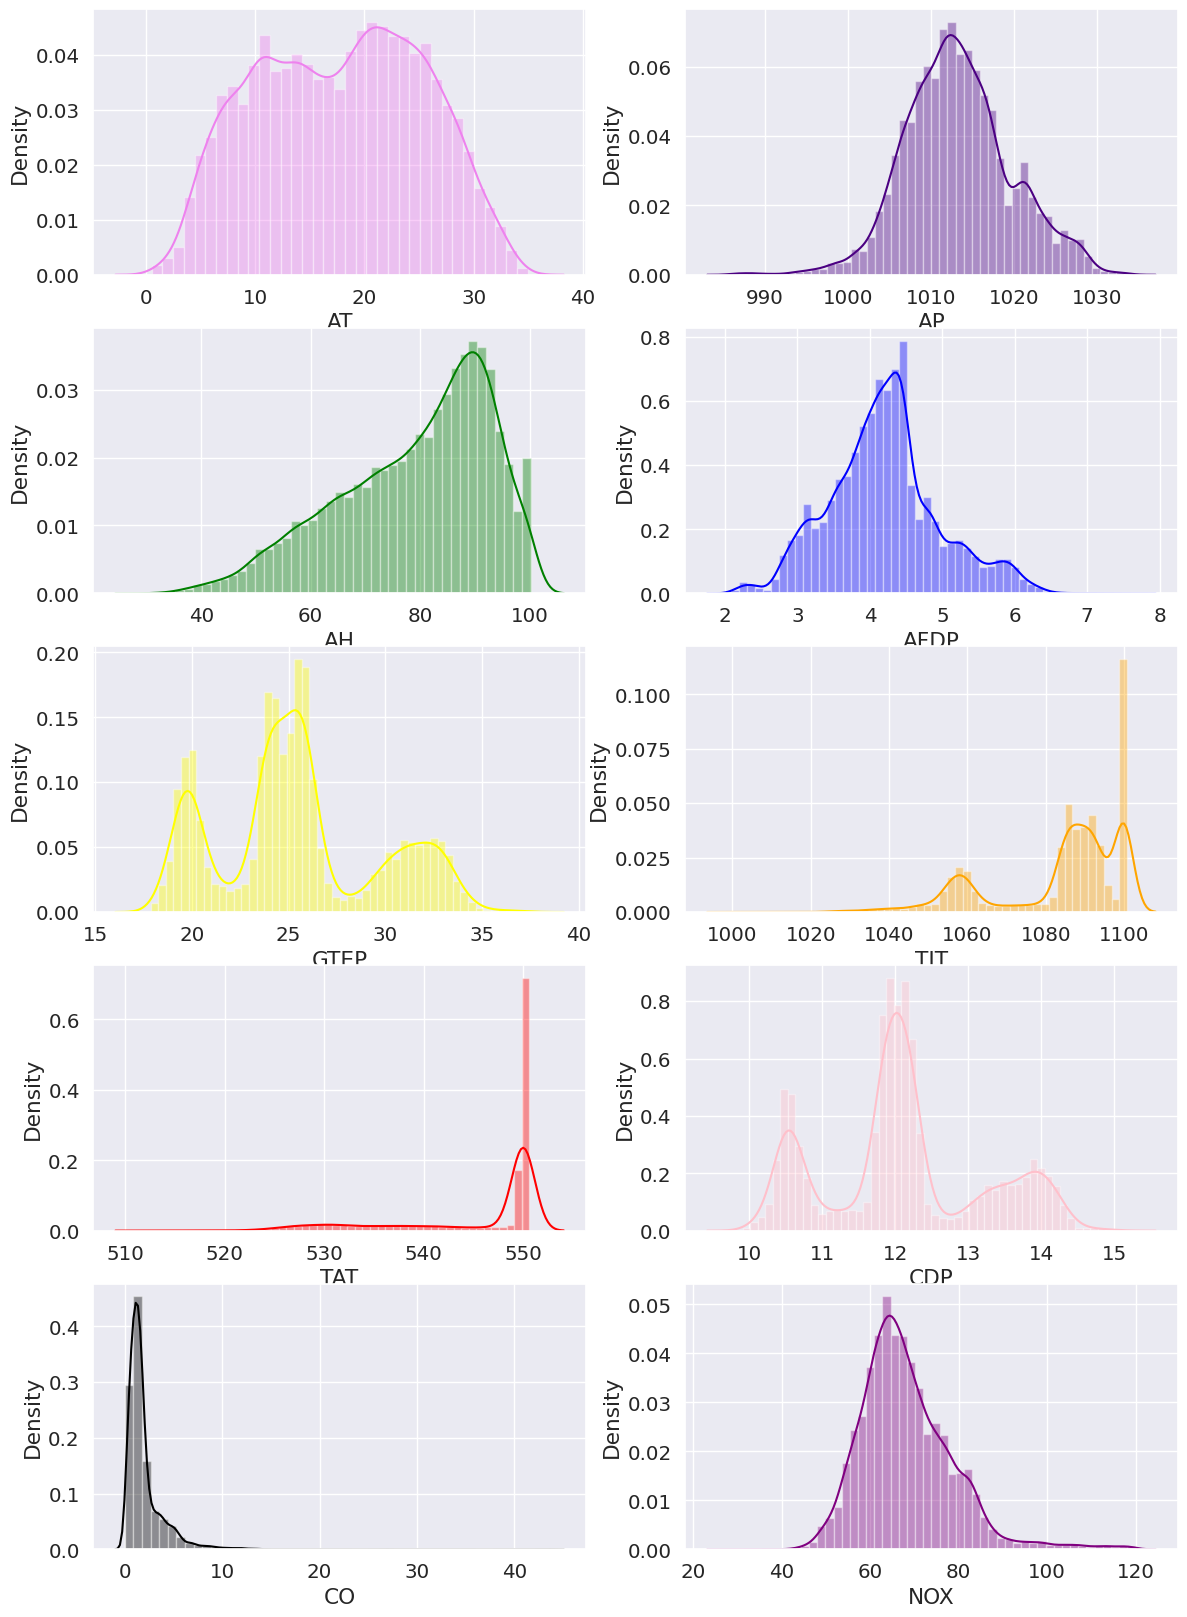

In [107]:
#Univariate plots
fig, ax = plt.subplots(5,2, figsize = (14,20))

sns.distplot(df.AT, ax = ax[0,0],color='violet')
sns.distplot(df.AP, ax = ax[0,1],color='indigo')
sns.distplot(df.AH, ax = ax[1,0],color='green')
sns.distplot(df.AFDP, ax = ax[1,1],color='blue')
sns.distplot(df.GTEP, ax = ax[2,0],color='yellow')
sns.distplot(df.TIT, ax = ax[2,1],color='orange')
sns.distplot(df.TAT, ax = ax[3,0],color='red')
sns.distplot(df.CDP, ax = ax[3,1],color='pink')
sns.distplot(df.CO, ax = ax[4,0],color='black')
sns.distplot(df.NOX, ax = ax[4,1],color='purple')

plt.show()

 Outliers Detection

In [108]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    for col in df.columns.tolist():         # iterate over features(columns)
        Q1 = np.percentile(df[col],25)      # 1st quartile (25%)
        Q3 = np.percentile(df[col],75)      # 3rd quartile (75%)
        IQR = Q3 - Q1                       # Interquartile rrange (IQR)

        outlier_step = 1.5 * IQR            # outlier step

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # Append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # Select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers
print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features]))))


The dataset contains 1543 observations with more than 2 outliers


In [109]:
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

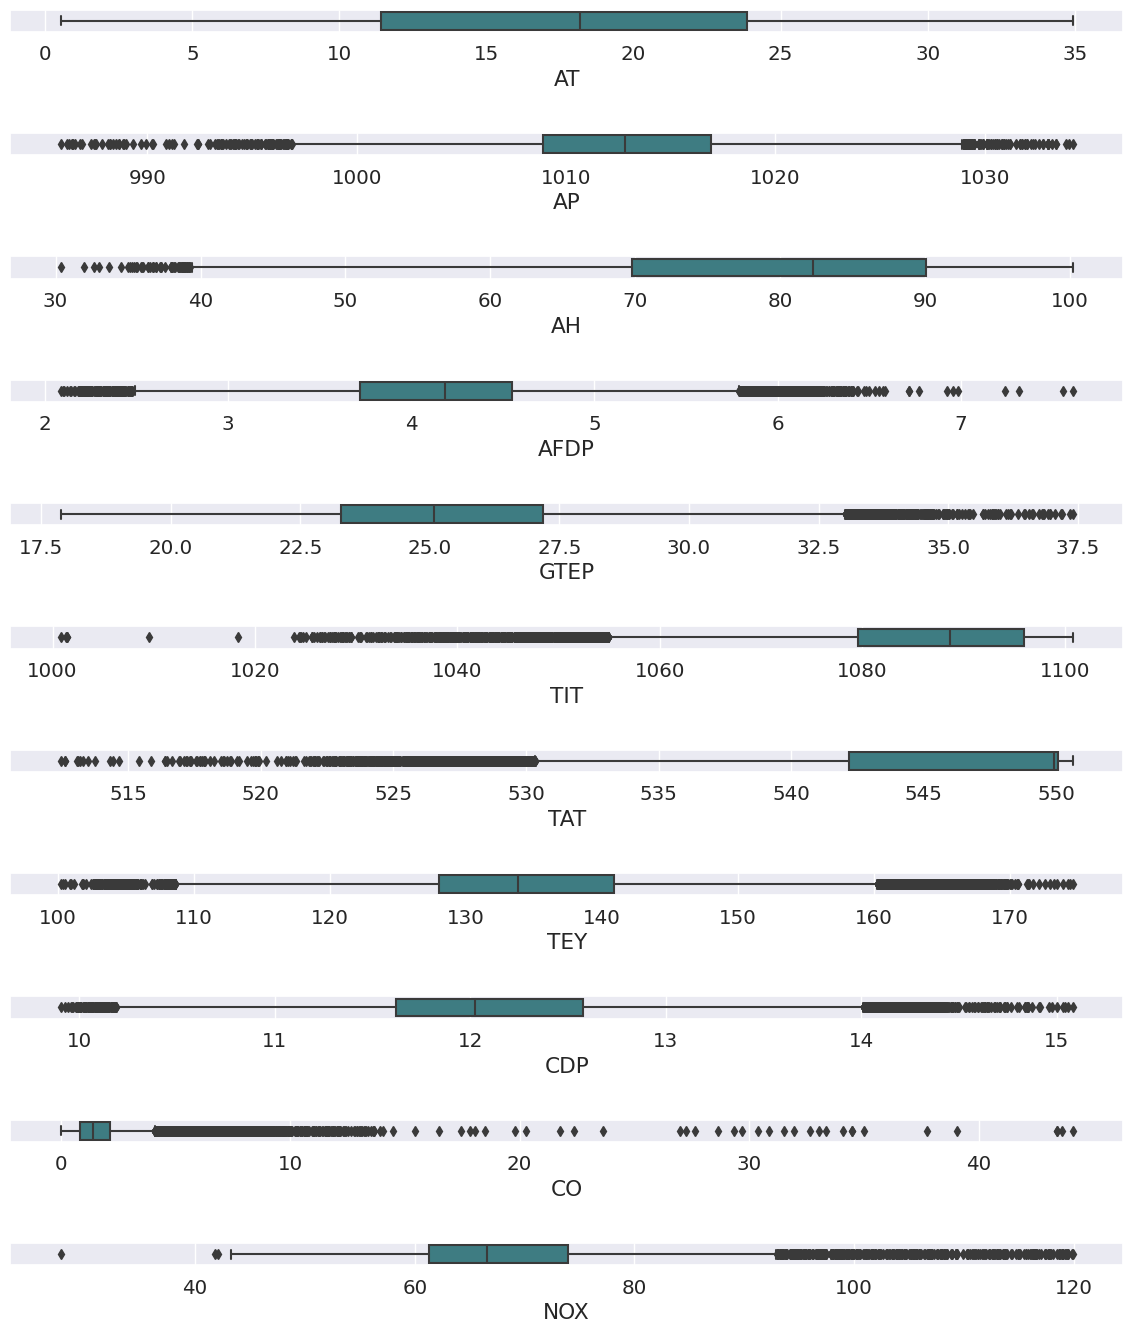

In [110]:
outlier = df.copy()
fig, axes=plt.subplots(11,1,figsize=(12,14),sharex=False,sharey=False)
sns.boxplot(x='AT',data= outlier,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data= outlier,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data= outlier,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data= outlier,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data= outlier,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data= outlier,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data= outlier,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data= outlier,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data= outlier,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data= outlier,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data= outlier,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

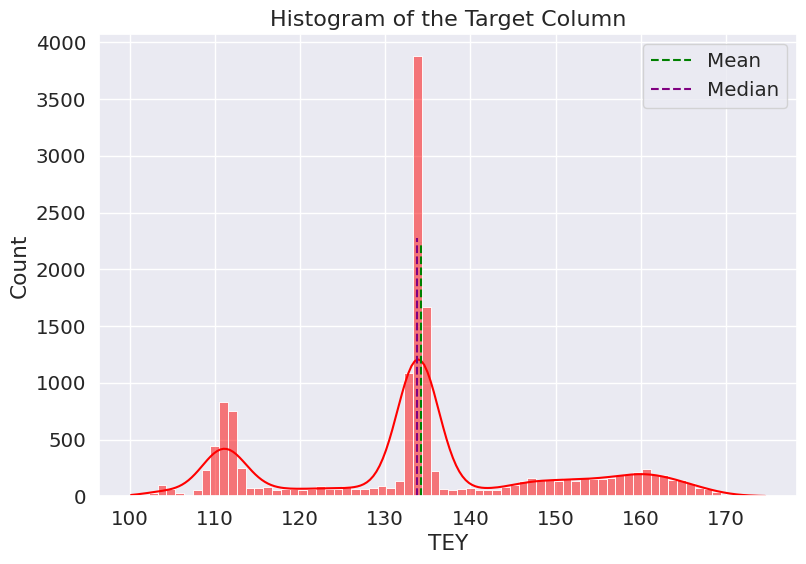

In [111]:
sns.set_style("darkgrid")
plt.figure(figsize=(9,6))
sns.histplot(data= df, x= "TEY", color= "red", kde= True)
plt.axvline(x=df["TEY"].mean(), ymax= 0.55, color= "green", linestyle= '--', label= "Mean")
plt.axvline(x=df["TEY"].median(), ymax= 0.56, color= "purple", linestyle= '--',label= "Median")
plt.title("Histogram of the Target Column", fontsize=16)
plt.legend();

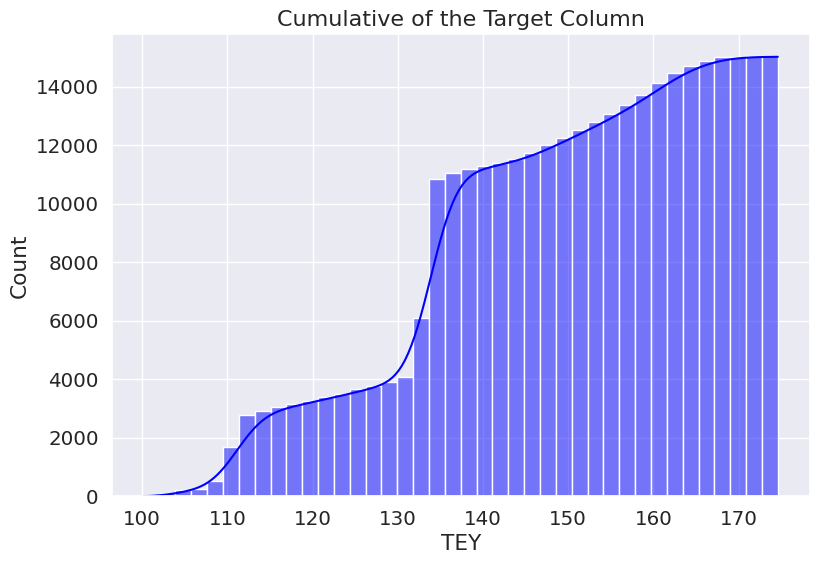

In [112]:
plt.figure(figsize = (9,6))
sns.histplot(df["TEY"], kde= True, bins= 40, color= "blue", cumulative= True)
plt.title("Cumulative of the Target Column", fontsize=16);

Correlation Matrix

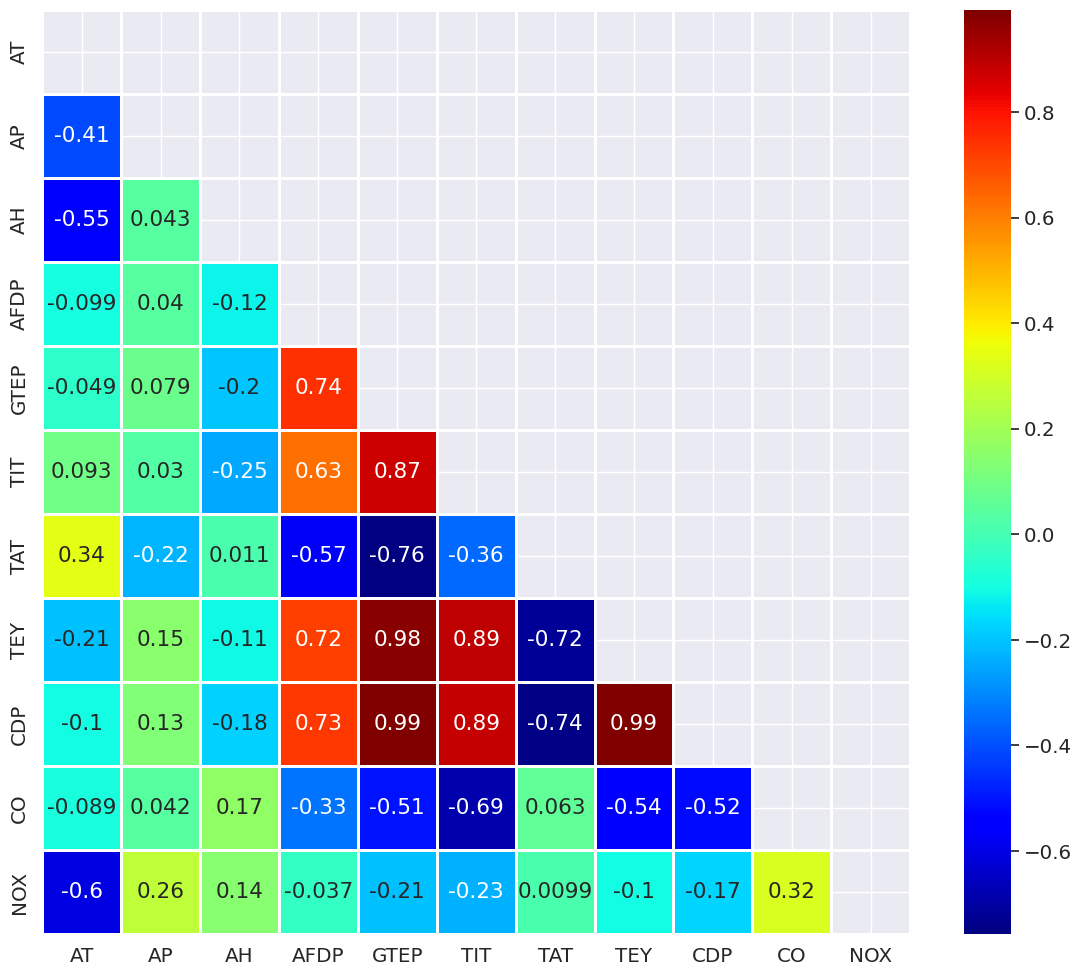

In [113]:
plt.figure(figsize=(14,12))
mask = np.zeros_like(df.corr(), dtype= np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data= df.corr(), cmap= "jet", annot= True, linewidths= 1, linecolor= 'white', mask=mask);


In [114]:
x = df.drop('TEY', axis=1)
y = df[["TEY"]]

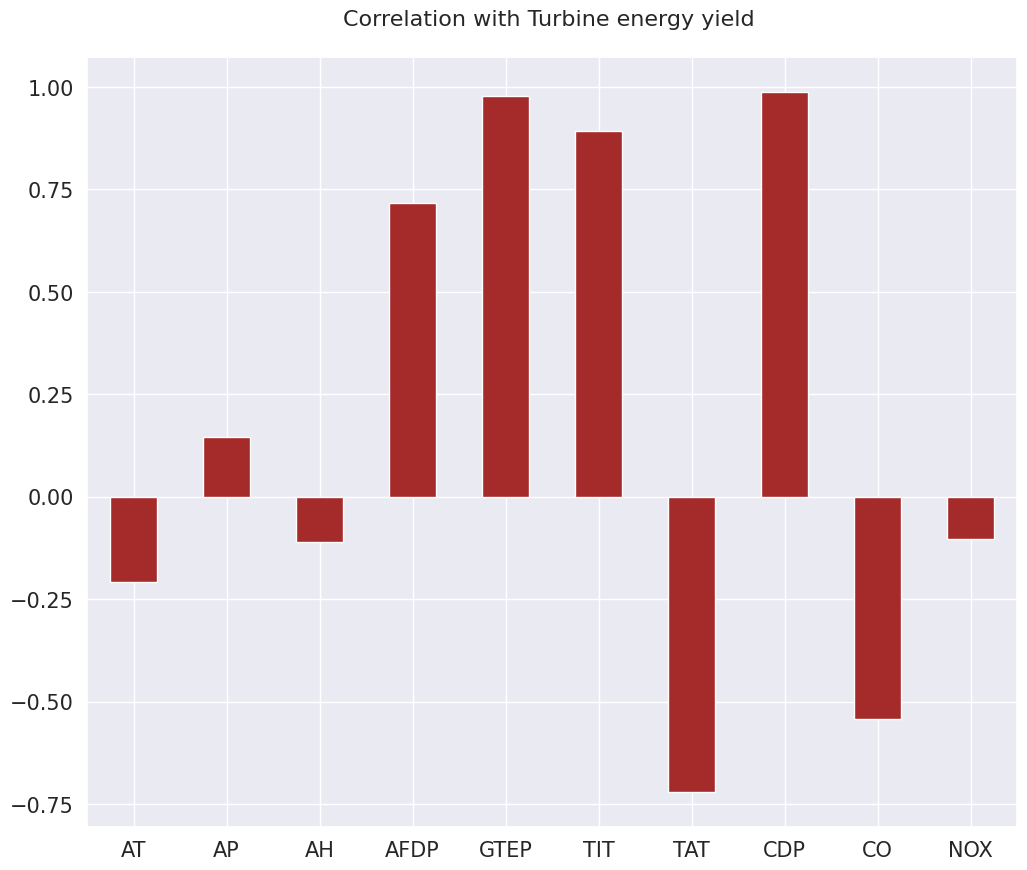

In [115]:
data2 = df.copy()

correlations = data2.corrwith(df.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations>0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize=(12,10), fontsize = 15, color = 'brown', rot = 0, grid = True)
plt.title('Correlation with Turbine energy yield \n', fontsize = "16", fontfamily = "sans-serif")
plt.show()

Data Pre-Processing

Feature Selection Technique

In [116]:
from numpy import set_printoptions
from sklearn.feature_selection import mutual_info_regression

In [117]:
#Feature Extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

In [118]:
#Summarize Scores
scores = fit.scores_
features = fit.transform(x)
score_df = pd.DataFrame(list(zip(scores, x.columns)), columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,1.712438,CDP
4,1.600424,GTEP
5,1.325173,TIT
6,0.892692,TAT
3,0.660497,AFDP
8,0.512833,CO
0,0.412477,AT
9,0.300181,NOX
1,0.137722,AP
2,0.097448,AH


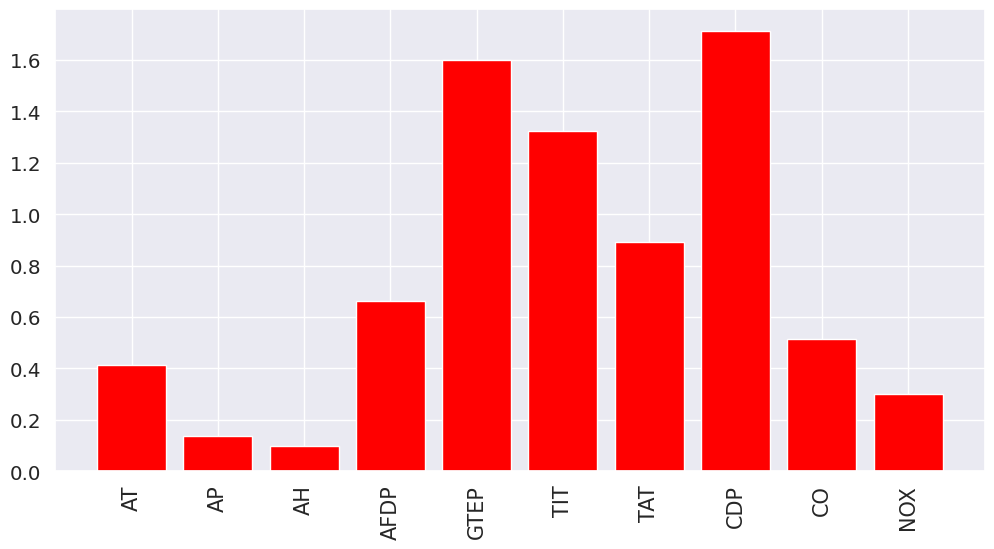

In [119]:
fig, axes = plt.subplots(figsize=(12,6))
plt.bar([i for i in range(len(scores))],scores,color='red')
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

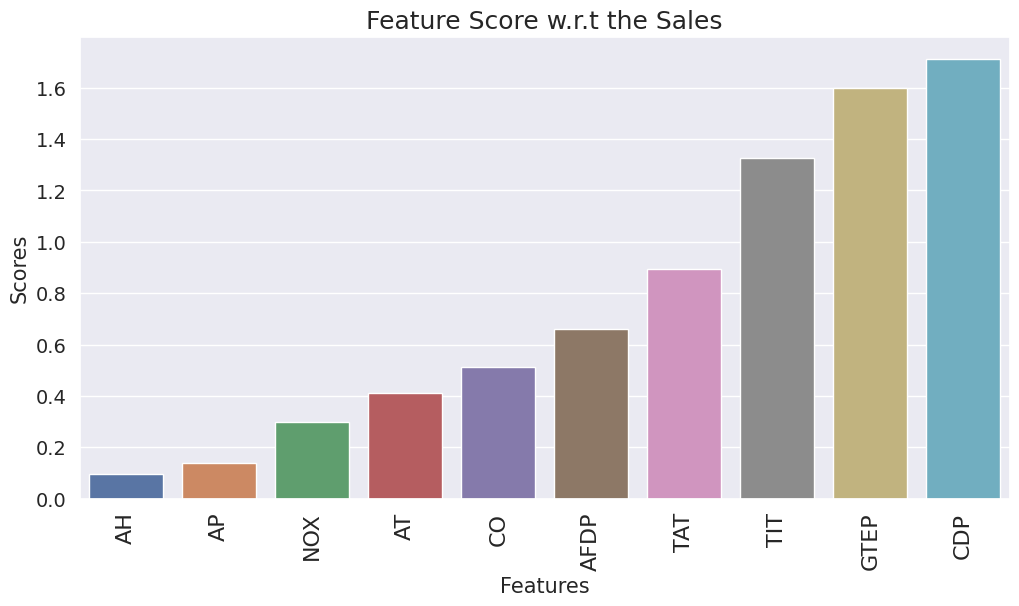

In [120]:
plt.figure(figsize=(12,6))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [121]:
score_df.sort_values('Score', ascending=False)

,Score,Feature
7,1.712438,CDP
4,1.600424,GTEP
5,1.325173,TIT
6,0.892692,TAT
3,0.660497,AFDP
8,0.512833,CO
0,0.412477,AT
9,0.300181,NOX
1,0.137722,AP
2,0.097448,AH


In [122]:
model_data = df[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


Feature Engineering

In [123]:
#Applying Standard Scaler
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [124]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909


In [126]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1))

Mean
 CDP     0.0
GTEP   -0.0
TIT    -0.0
TAT     0.0
AFDP    0.0
CO      0.0
AT      0.0
TEY     0.0
dtype: float64


In [127]:
print('Standard Devaition','\n',np.round(df_standard_scaled.std(),1))

Standard Devaition 
 CDP     1.0
GTEP    1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64


Test Train Split With Imbalanced Dataset

In [128]:
x = df_standard_scaled.drop('TEY',axis=1)
y = df_standard_scaled[['TEY']]

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)


Hyperparameter Tuning

Hyperparameter Tuning: Optimal Learning rate ,Number of Layers and Neurons

In [130]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units = hp.Int('units_' + str(i), min_value=32, max_value=100, step=32), activation='relu'))

    model.add(layers.Dense(1, activation='linear'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error', metrics=['mean_absolute_error'])
    return model
from keras_tuner.tuners import RandomSearch

In [131]:
tuner = RandomSearch(build_model, objective= 'val_mean_absolute_error', max_trials= 5,
                     executions_per_trial= 3, directory= 'project', project_name= 'Gas Turbine')
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [132]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))

Trial 5 Complete [00h 15m 13s]
val_mean_absolute_error: 0.029369785139958065

Best val_mean_absolute_error So Far: 0.02371682661275069
Total elapsed time: 01h 03m 33s


In [133]:
tuner.results_summary()

Results summary
Results in project/Gas Turbine
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 0 summary
Hyperparameters:
num_layers: 6
units_0: 96
units_1: 32
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
Score: 0.02371682661275069

Trial 2 summary
Hyperparameters:
num_layers: 7
units_0: 64
units_1: 96
learning_rate: 0.0001
units_2: 64
units_3: 32
units_4: 32
units_5: 96
units_6: 96
units_7: 96
units_8: 32
units_9: 32
units_10: 96
units_11: 96
units_12: 96
units_13: 96
units_14: 64
units_15: 64
units_16: 96
units_17: 64
Score: 0.02389731692771117

Trial 1 summary
Hyperparameters:
num_layers: 18
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 64
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
units_17: 32
Score: 0.024841172620654106

Trial 3 summary
Hyperparameters:
num_layers: 17
units_0: 96

Hyperparameter Tuning: Optimal Batch_size, Number of Epochs

In [134]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))

    adam=Adam(learning_rate=0.001)
    model1.compile(loss= 'mean_absolute_error', optimizer= adam, metrics= ["mean_absolute_error"])
    return model1

In [135]:
model1     = KerasRegressor(build_fn=create_model,verbose=0)
batch_size = [20,40,50]
epochs     = [50,100,200]
param_grid = dict(batch_size= batch_size, epochs= epochs)
grid = GridSearchCV(estimator= model1, param_grid= param_grid, cv= KFold(), verbose= 10)

In [136]:
grid_result1 = grid.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=20, epochs=50....................................
[CV 1/5; 1/9] END ....batch_size=20, epochs=50;, score=-0.038 total time=  42.3s
[CV 2/5; 1/9] START batch_size=20, epochs=50....................................
[CV 2/5; 1/9] END ....batch_size=20, epochs=50;, score=-0.034 total time=  42.6s
[CV 3/5; 1/9] START batch_size=20, epochs=50....................................
[CV 3/5; 1/9] END ....batch_size=20, epochs=50;, score=-0.031 total time=  28.6s
[CV 4/5; 1/9] START batch_size=20, epochs=50....................................
[CV 4/5; 1/9] END ....batch_size=20, epochs=50;, score=-0.032 total time=  42.4s
[CV 5/5; 1/9] START batch_size=20, epochs=50....................................
[CV 5/5; 1/9] END ....batch_size=20, epochs=50;, score=-0.035 total time=  42.7s
[CV 1/5; 2/9] START batch_size=20, epochs=100...................................
[CV 1/5; 2/9] END ...batch_size=20, epochs=100;, 

In [165]:
print('Best {}, using {}'.format(grid_result1.best_score_, grid_result1.best_params_))
means  = grid_result1.cv_results_["mean_test_score"]
stds   = grid_result1.cv_results_["std_test_score"]
params = grid_result1.cv_results_["params"]
for mean,stdev,param in zip(means, stds,params):
    print("{}, {} with {}".format(mean, stdev, param))

Best -0.02854469232261181, using {'batch_size': 50, 'epochs': 200}
-0.034033377841115, 0.002311370875416488 with {'batch_size': 20, 'epochs': 50}
-0.034114376083016394, 0.00442876947686775 with {'batch_size': 20, 'epochs': 100}
-0.031624552235007285, 0.003994983550171365 with {'batch_size': 20, 'epochs': 200}
-0.032621532678604126, 0.004022949869495539 with {'batch_size': 40, 'epochs': 50}
-0.031911810487508775, 0.003214471392186649 with {'batch_size': 40, 'epochs': 100}
-0.02936517968773842, 0.0017633103383380656 with {'batch_size': 40, 'epochs': 200}
-0.03115178309381008, 0.0019278697147379494 with {'batch_size': 50, 'epochs': 50}
-0.03144424445927143, 0.002589633992080111 with {'batch_size': 50, 'epochs': 100}
-0.02854469232261181, 0.001767847860248751 with {'batch_size': 50, 'epochs': 200}


 Hyperparameter Tuning:  Optimal Activation Function and Kernel Initializer

In [166]:
 def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(32,input_dim=7,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(units=1,activation="linear"))

    adam = Adam(lr=0.001)
    model3.compile(loss= 'mean_absolute_error', optimizer= adam, metrics= ["mean_absolute_error"])
    return model3

In [167]:
model3 = KerasRegressor(build_fn=create_model, batch_size=40,epochs=200,verbose=0)
activation_function = ['softmax','tanh','relu']
init = ['normal','uniform','zero']
param_grid = dict(activation_function= activation_function, init= init)
grid3 = GridSearchCV(estimator= model3, param_grid= param_grid, cv= KFold(), verbose=10)




Model Building Neural Networks

Standardizing only predictor variable - after train test split

In [142]:
model_data

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72
...,...,...,...,...,...,...,...,...
15034,10.400,19.164,1049.7,546.21,3.5421,4.5186,9.0301,111.61
15035,10.433,19.414,1046.3,543.22,3.5059,4.8470,7.8879,111.78
15036,10.483,19.530,1037.7,537.32,3.4770,7.9632,7.2647,110.19
15037,10.533,19.377,1043.2,541.24,3.4486,6.2494,7.0060,110.74


In [143]:
#Assigning predictor variables to x and response variable to y
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test)   # scaling test data -- predictor

print("x_train_scaled :", x_train_scaled.shape)
print("x_test_scaled  :",x_test_scaled.shape)
print("y_train        :",y_train.shape)
print("y_test         :",y_test.shape)

x_train_scaled : (12031, 7)
x_test_scaled  : (3008, 7)
y_train        : (12031, 1)
y_test         : (3008, 1)


In [144]:
#Since we have continuous ouput, AF is not required in the o/p layer
model = Sequential()
model.add( Dense(units= 50, activation= 'relu', kernel_initializer= 'normal', input_dim= 7)) # input layer
model.add( Dense(units= 20, activation= 'tanh', kernel_initializer= 'normal')) # hidden layer
model.add( Dense(units= 1, kernel_initializer= 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss= "mse", metrics= ["mae", "mse"])

In [145]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):

    # Defining list of hyperparameters
    batch_size_list = [10 , 15 , 20 ]
    epoch_list      = [10 , 50 , 100]

    bestParamTable = pd.DataFrame()

    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:

            # Create ANN model
            model = Sequential()

            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')

            # Fitting the ANN to the Training set
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))

            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]], columns=['batchsize','epochs','Accuracy'] ))

            # Printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:', epochs_trial, 'Accuracy:', 100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)

94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 10 Accuracy: TEY    98.428465
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.561154
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 100 Accuracy: TEY    99.438053
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 15 - epochs: 10 Accuracy: TEY    89.845927
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 15 - epochs: 50 Accuracy: TEY    99.663829
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 15 - epochs: 100 Accuracy: TEY    99.647694
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 20 - epochs: 10 Accuracy: TEY    80.860203
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 20 - epochs: 50 Accuracy: TEY    99.578758
dtype: float64
94/94 [=======

In [146]:
#Training Model - using best params
model.compile(optimizer ='adam', loss = 'mean_squared_error')
model.fit(x_train_scaled,y_train, batch_size= 20, epochs= 10, verbose= 0)

Model Evaluation Train and Test Error

In [147]:
# generating predictions for test data
y_predict_test = model.predict(x_test_scaled)

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 1ms/step
(3008, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
13312,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.0930,134.46,107.142746
12627,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.4500,111.88,107.142792
6393,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.2620,133.72,107.142708
4990,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.8620,133.79,107.142761
12462,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.4090,110.77,107.142792
7405,10.624,19.387,1058.9,550.17,3.3709,4.27640,2.2158,113.32,107.142792
10993,12.088,25.392,1089.7,550.11,3.7871,0.83578,23.8520,133.77,107.142723
9488,11.498,23.225,1079.4,549.60,4.2837,2.01980,12.3950,128.98,107.142677
14201,13.971,32.518,1100.1,528.98,5.1559,0.87760,12.3590,159.42,107.142792
9757,13.862,32.105,1100.0,530.69,5.9309,10.75000,8.6376,161.86,107.142792


In [148]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis= 1 , inplace= True)


In [149]:
# Computing the absolute percent error
APE = 100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %'] = APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  81.03507354405897


,Actual,Predicted,APE %
13312,134.46,107.142746,20.316268
12627,111.88,107.142792,4.234187
6393,133.72,107.142708,19.875331
4990,133.79,107.142761,19.917213
12462,110.77,107.142792,3.274540


In [150]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,Actual,Predicted,APE %,Error
0,134.46,107.142746,20.316268,0.203163
1,111.88,107.142792,4.234187,0.042342
2,133.72,107.142708,19.875331,0.198753
3,133.79,107.142761,19.917213,0.199172
4,110.77,107.142792,3.274540,0.032745
...,...,...,...,...
3003,119.25,107.142784,10.152802,0.101528
3004,133.74,107.142784,19.887256,0.198873
3005,146.31,107.142792,26.770015,0.267700
3006,150.07,107.142792,28.604790,0.286048


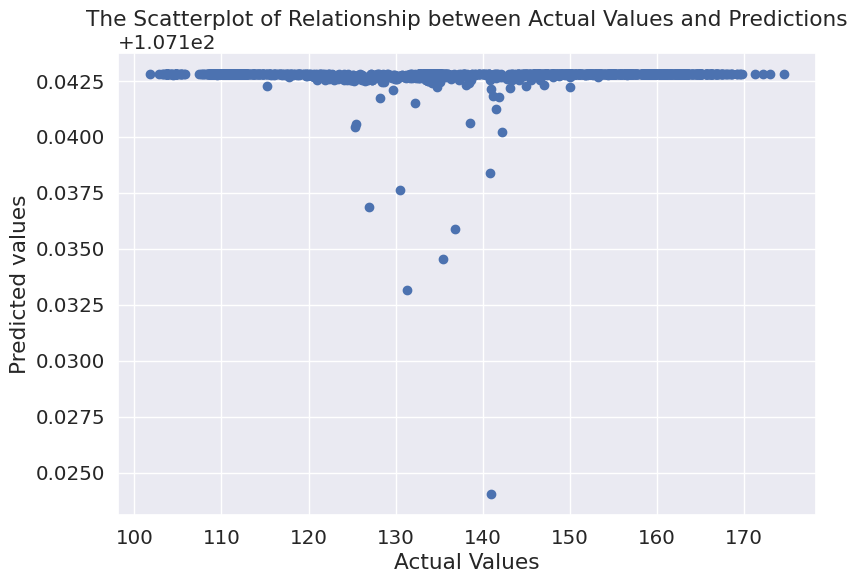

In [151]:
#Visualizing the Relationship between the Actual and Predicted ValuesModel Validation
plt.figure(figsize=(9,6))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [152]:
#evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE  :",metrics.mean_absolute_error(y_test,y_predict_test))
print("MSE  :",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE  : 26.901042931739322
MSE  : 969.2326819207129
RMSE : 31.132502018320224


In [153]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled)
print('R2_score (train) : ',r2_score(y_train, y_predict_train))
print('R2_score (test)  : ',r2_score(y_test, y_predict_test))

376/376 [==============================] - 1s 2ms/step
R2_score (train) :  -2.9316736724896506
R2_score (test)  :  -2.8708980457699687


In [154]:
#Evaluation of the explained variance score (R^2)
print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2)))


This shows our model predict % -0.0 of the target correctly


<Axes: ylabel='Density'>

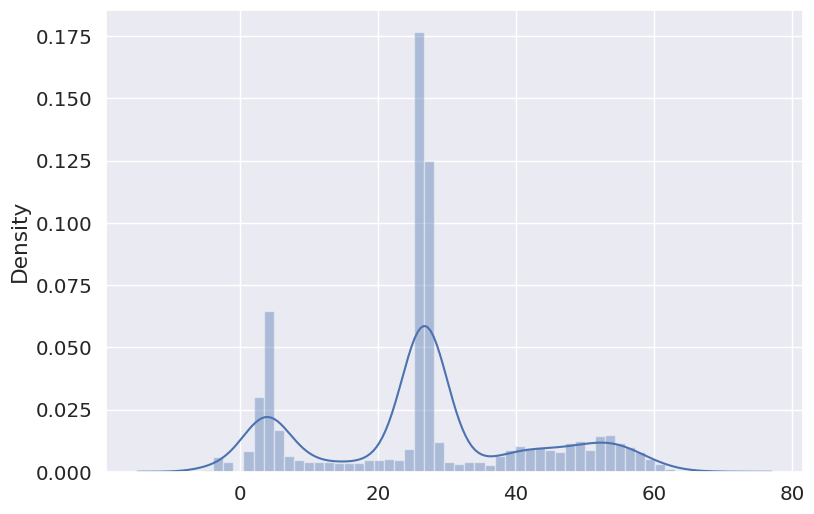

In [155]:
# Now we will visualize the differences between our predictions and actual y test data
plt.figure(figsize=(9,6))
sns.distplot(y_test-y_predict_test,bins=50)

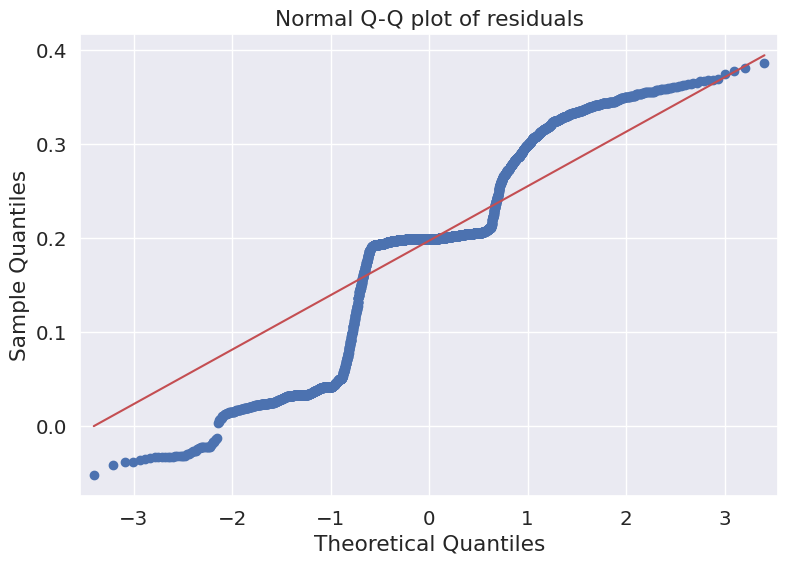

In [156]:
import statsmodels.api as smf
plt.rcParams["figure.figsize"] = (9,6)
smf.qqplot(predictions_df['Error'], line= 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

Observation:
 Error should have Normal / Gaussian distribution~N(0,1) and independently and identically distributed.